# Data Cleaning

### Read dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
from matplotlib import pyplot as plt


# this dataset is seperated by ';'
df = pd.read_csv('CVDdataset/cardio_train.csv', sep=';')
df.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


In [2]:
df.shape

(70000, 13)

### Clean dataset

In [3]:
import numpy as np 
from matplotlib import pyplot as plt


In [4]:
df['gender'] = df['gender'].map({2: 1, 1: 0})
df.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,1,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,0,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,0,165,64.0,130,70,3,1,0,0,0,1


In [5]:
# Check for any null values

df.isnull().all()

id             False
age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

In [6]:
# removed unique value column as it is not required for training 

df.drop(columns=['id'], inplace=True)

In [7]:
# Identified duplicates in the dataset

duplicated = df[df.duplicated(keep=False)]
duplicated.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1142,17493,1,169,74.0,120,80,1,1,0,0,1,1
1204,16793,0,165,68.0,120,80,1,1,0,0,1,0
1568,21945,0,165,60.0,120,80,1,1,0,0,1,0
1612,20293,0,162,70.0,110,70,1,1,0,0,1,0
2305,20495,0,165,70.0,120,80,1,1,0,0,1,0


In [8]:
# Removed duplicates and kept only the first instance of it

df.drop_duplicates(keep = 'first', inplace = True)
print('Total {} datapoints remaining with {} features'.format(df.shape[0], df.shape[1]))

Total 69976 datapoints remaining with 12 features


In [9]:
# Renamed the attributes for better understanding and clarity
df.rename(columns={'ap_hi': 'systolic', 'ap_lo': 'diastolic', 'gluc': 'glucose', 'alco': 'alcohol', 'cardio': 'cardiovascular_disease'}, inplace =True)



In [10]:
df.describe()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular_disease
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,19468.950126,0.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,2467.374620,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,10798.000000,0.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,0.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,0.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,1.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,1.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Feature Extraction

In [11]:
# Transformed the age into years 
df['age'] = df['age'] // 365

# Extracted bmi from height and weight 
df['bmi'] = round(df['weight'] / (df['height']/100)**2, 2)

df.head(10)

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular_disease,bmi
0,50,1,168,62.0,110,80,1,1,0,0,1,0,21.97
1,55,0,156,85.0,140,90,3,1,0,0,1,1,34.93
2,51,0,165,64.0,130,70,3,1,0,0,0,1,23.51
3,48,1,169,82.0,150,100,1,1,0,0,1,1,28.71
4,47,0,156,56.0,100,60,1,1,0,0,0,0,23.01
5,60,0,151,67.0,120,80,2,2,0,0,0,0,29.38
6,60,0,157,93.0,130,80,3,1,0,0,1,0,37.73
7,61,1,178,95.0,130,90,3,3,0,0,1,1,29.98
8,48,0,158,71.0,110,70,1,1,0,0,1,0,28.44
9,54,0,164,68.0,110,60,1,1,0,0,0,0,25.28


In [12]:
df['bmi'].describe()

count    69976.000000
mean        27.557642
std          6.092104
min          3.470000
25%         23.880000
50%         26.395000
75%         30.220000
max        298.670000
Name: bmi, dtype: float64

In [13]:
# Extracted pulse_pressure from systolic and diastolic blood pressure
df['pulse_pressure'] = df['systolic'] - df['diastolic']
df.head(10)

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular_disease,bmi,pulse_pressure
0,50,1,168,62.0,110,80,1,1,0,0,1,0,21.97,30
1,55,0,156,85.0,140,90,3,1,0,0,1,1,34.93,50
2,51,0,165,64.0,130,70,3,1,0,0,0,1,23.51,60
3,48,1,169,82.0,150,100,1,1,0,0,1,1,28.71,50
4,47,0,156,56.0,100,60,1,1,0,0,0,0,23.01,40
5,60,0,151,67.0,120,80,2,2,0,0,0,0,29.38,40
6,60,0,157,93.0,130,80,3,1,0,0,1,0,37.73,50
7,61,1,178,95.0,130,90,3,3,0,0,1,1,29.98,40
8,48,0,158,71.0,110,70,1,1,0,0,1,0,28.44,40
9,54,0,164,68.0,110,60,1,1,0,0,0,0,25.28,50


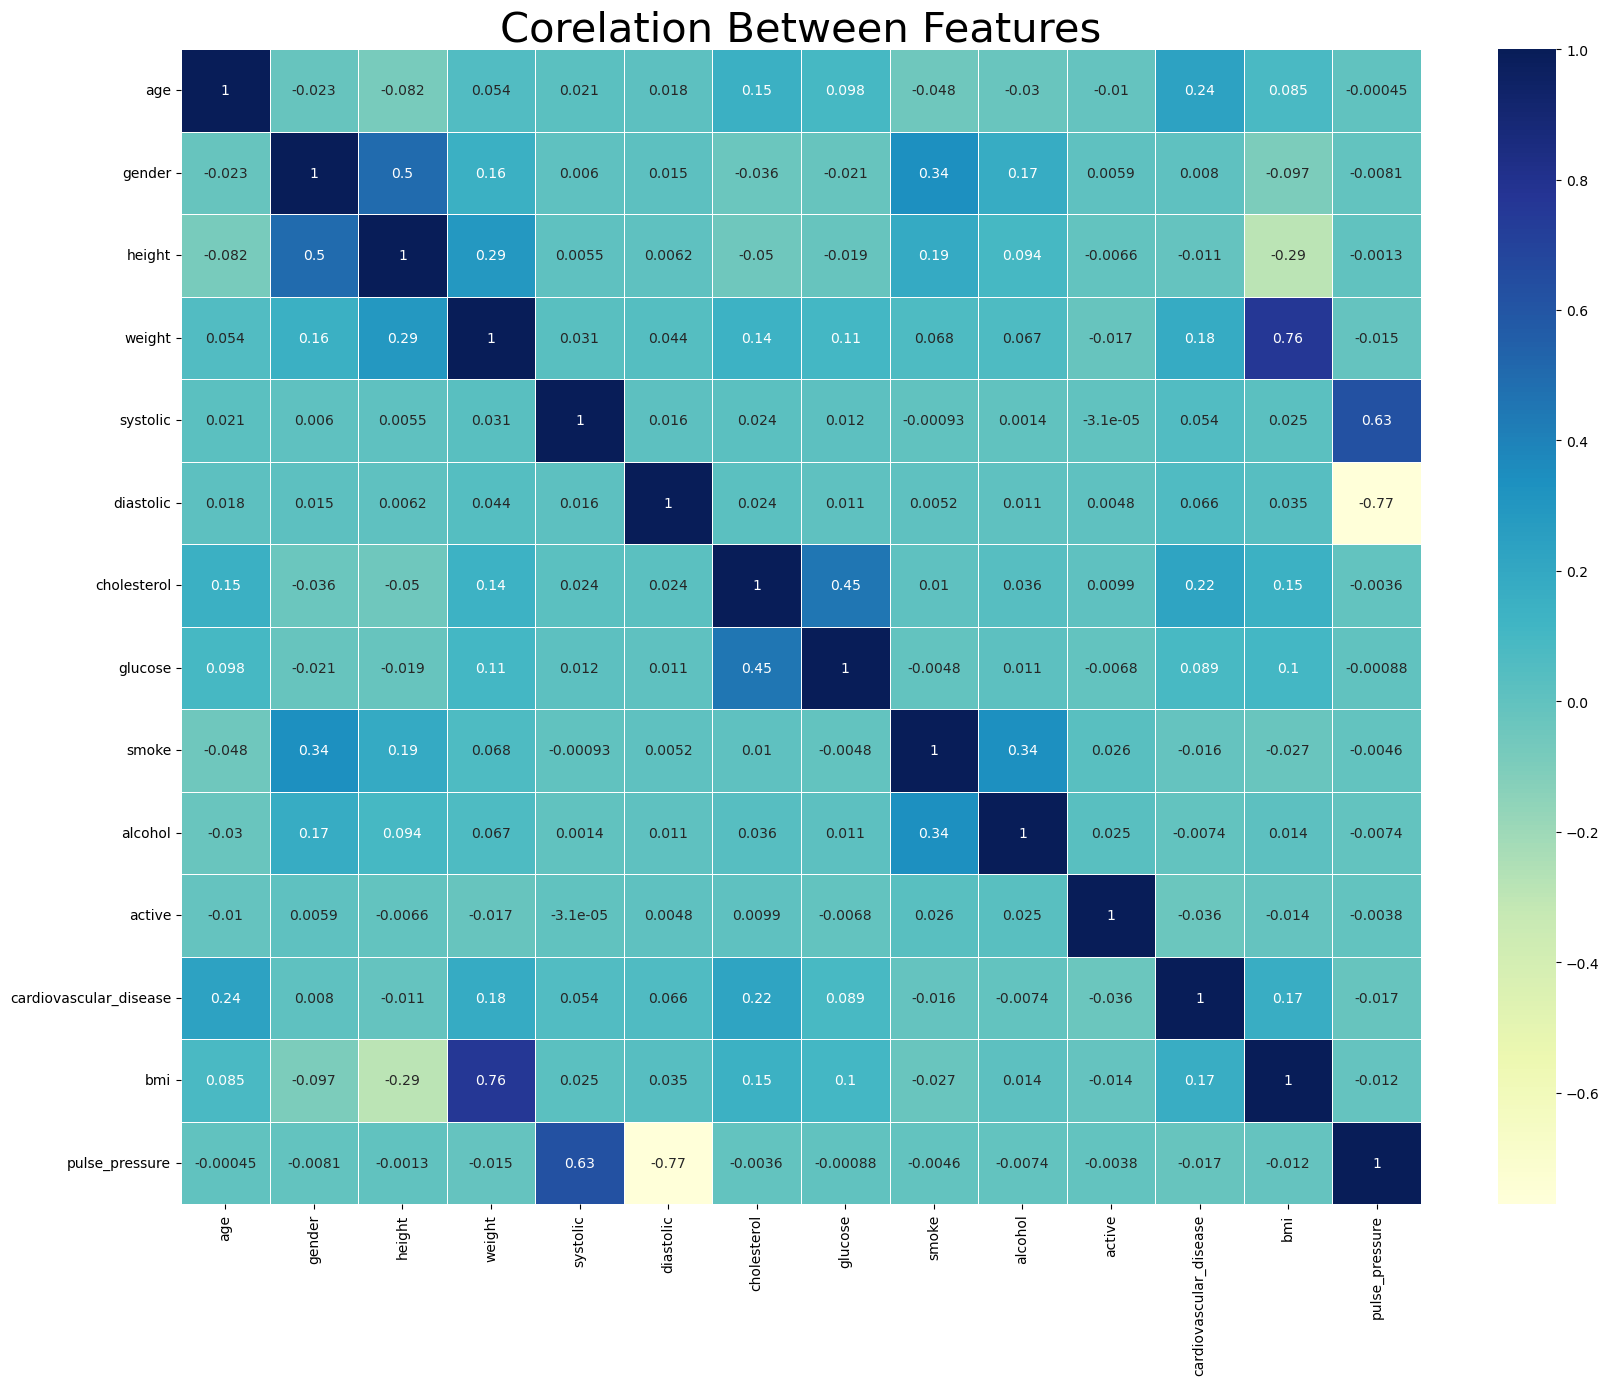

In [14]:
plt.rcParams['figure.figsize'] = (20, 15) 
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features', fontsize = 30)
plt.show()

### Remove outliers

In [15]:
# Determining total no of people btw 30 and 50
target_df = df [(df['age'] >= 30) & (df['age'] <= 50 )]
target_df.shape

(24613, 14)

In [16]:
filtered = target_df.copy()

In [17]:
# Removing outliers from the dataset for height and weight that fall below 2.5 and above 97.5 percentile of a given range.
filtered.drop(filtered[(filtered['height'] > filtered['height'].quantile(0.975))].index, inplace=True)
filtered.drop(filtered[(filtered['height'] < filtered['height'].quantile(0.025))].index, inplace=True)
filtered.drop(filtered[(filtered['weight'] > filtered['weight'].quantile(0.975))].index, inplace=True)
filtered.drop(filtered[(filtered['weight'] < filtered['weight'].quantile(0.025))].index, inplace=True)
        

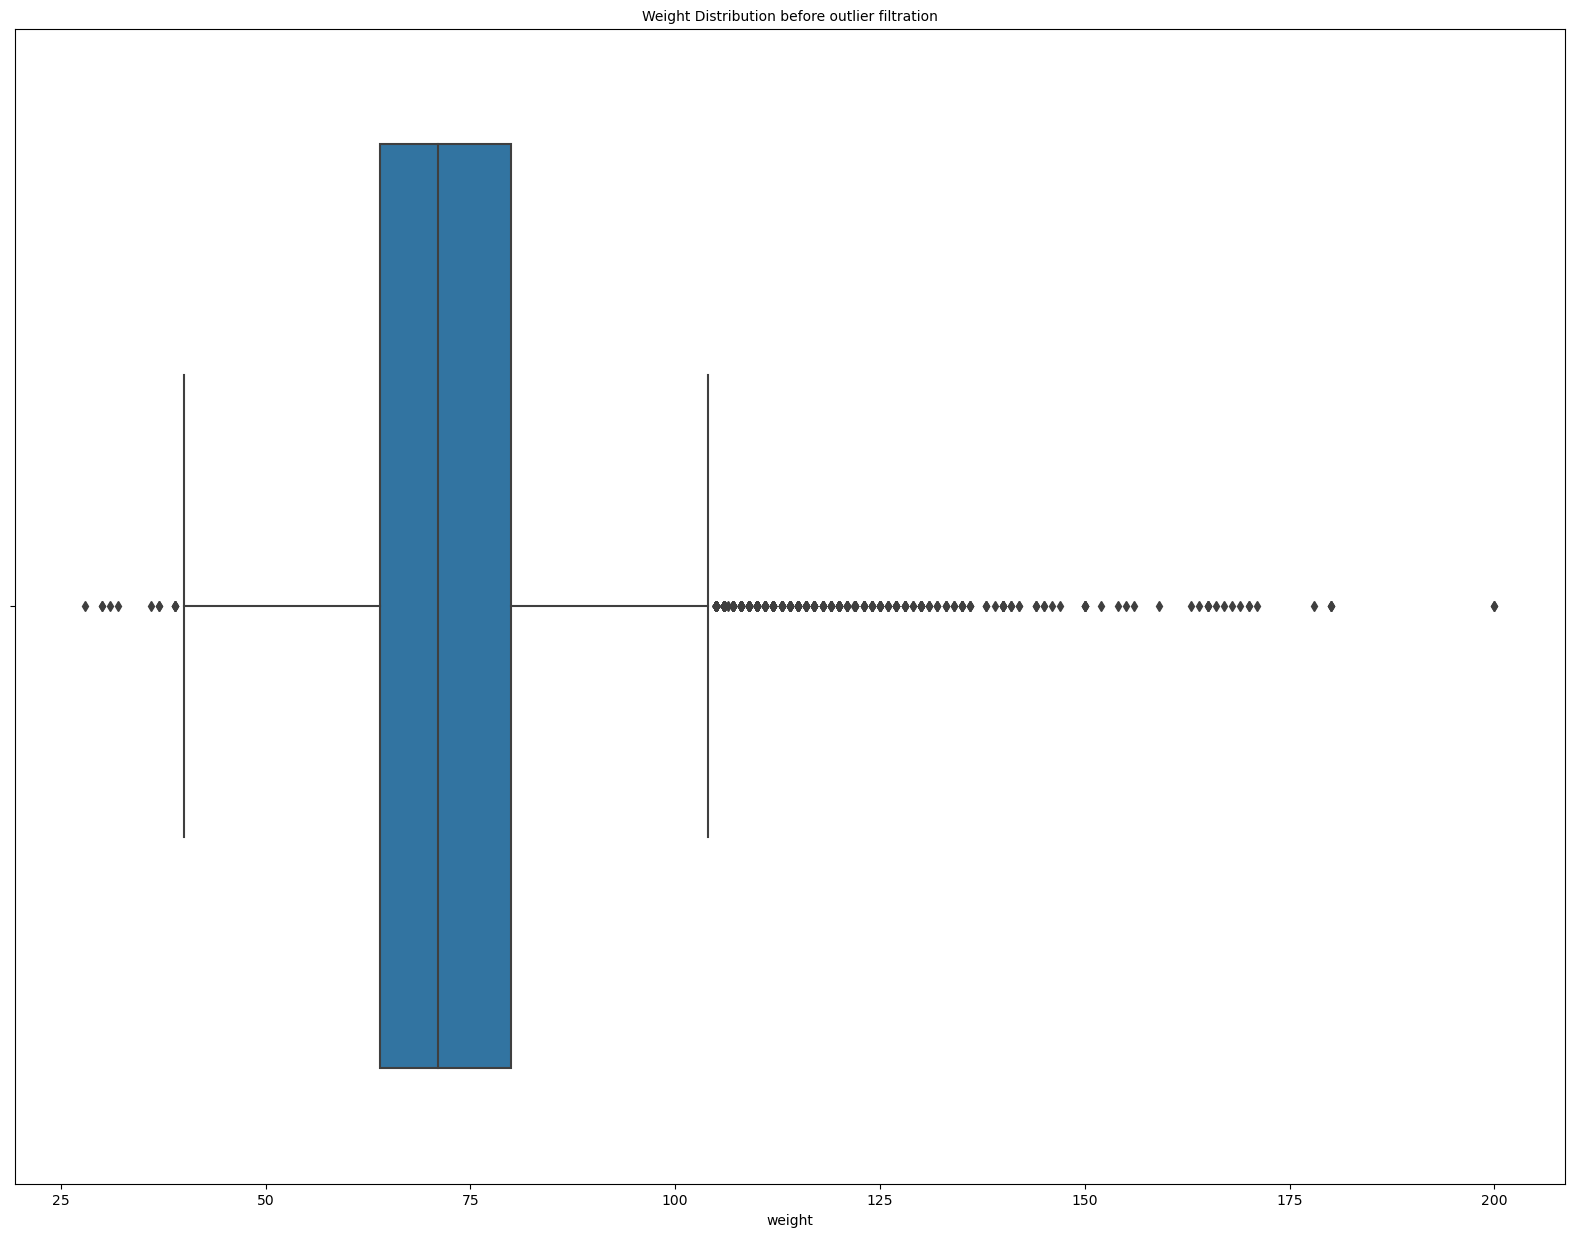

In [18]:
# Visualizing outliers using boxplot  

import seaborn as sns

weight_boxplot = sns.boxplot(x=target_df['weight'])
weight_boxplot.axes.set_title("Weight Distribution before outlier filtration", fontsize=10)
plt.show()

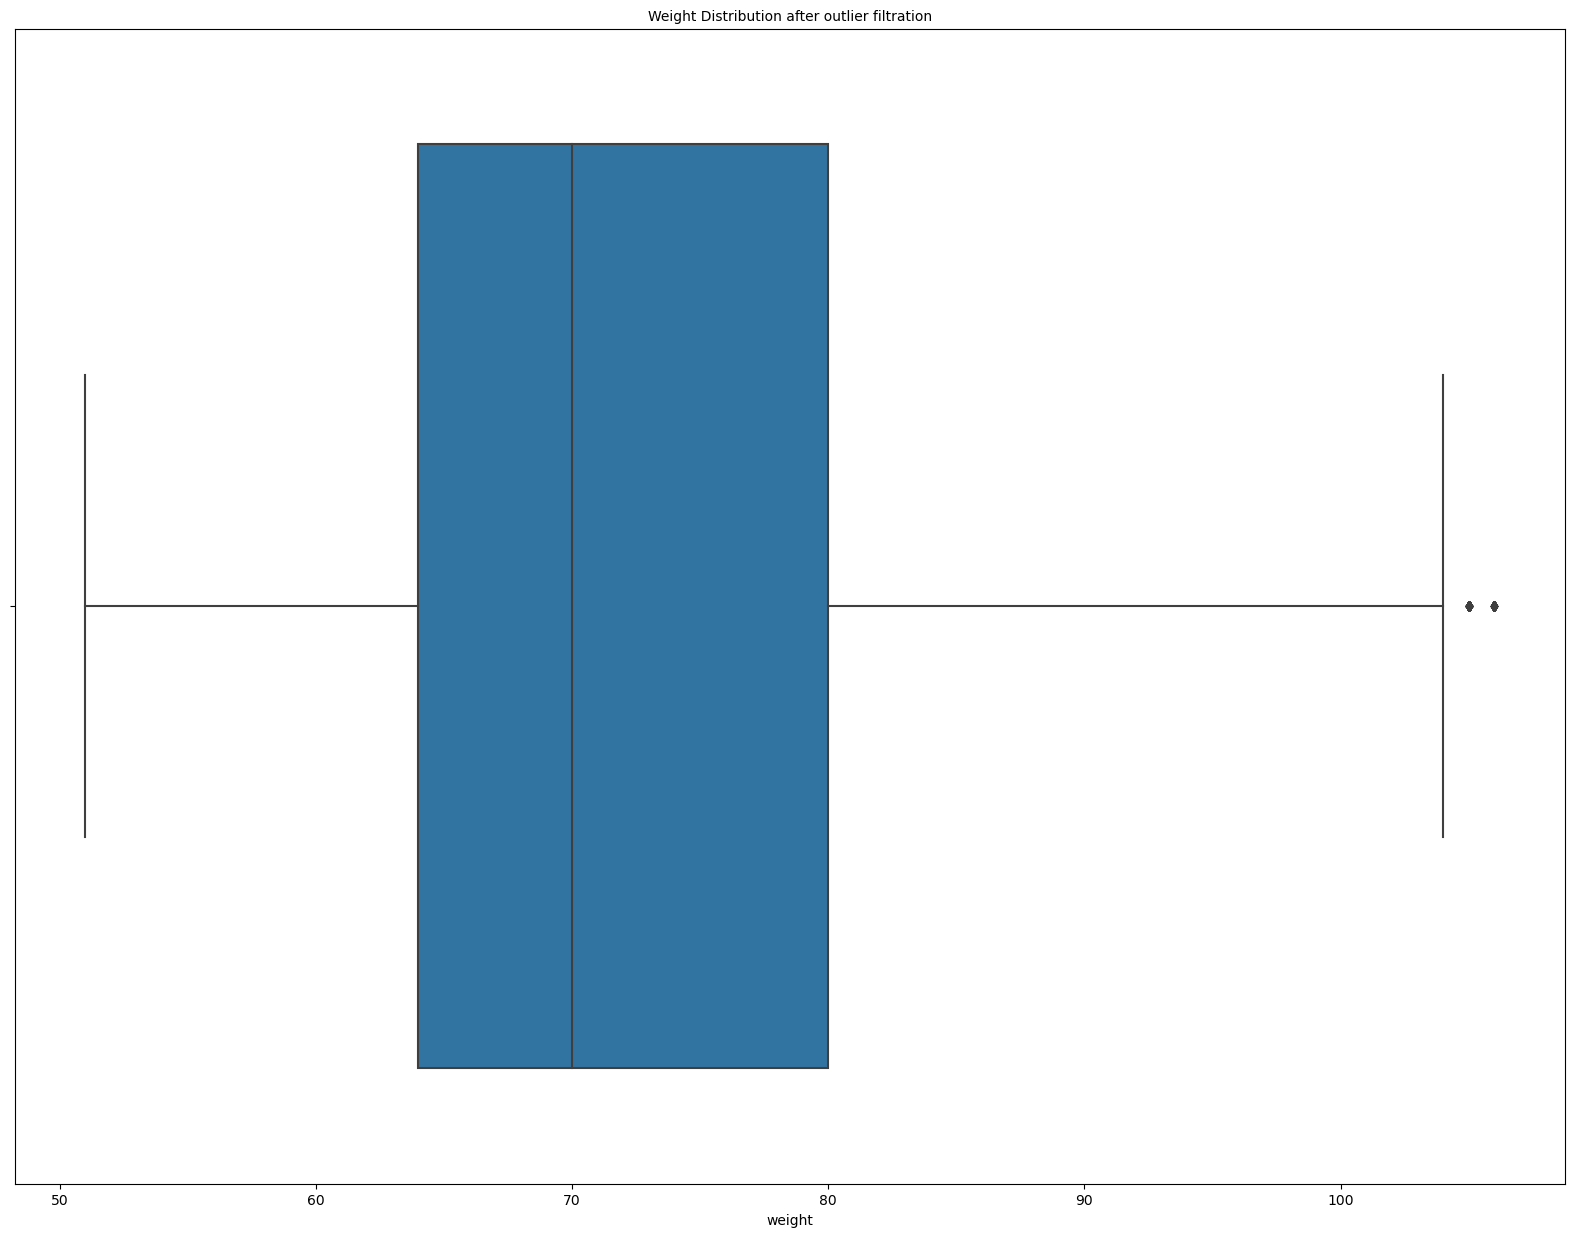

In [19]:
weight_boxplot = sns.boxplot(x=filtered['weight'])
weight_boxplot.axes.set_title("Weight Distribution after outlier filtration", fontsize=10)
plt.show()

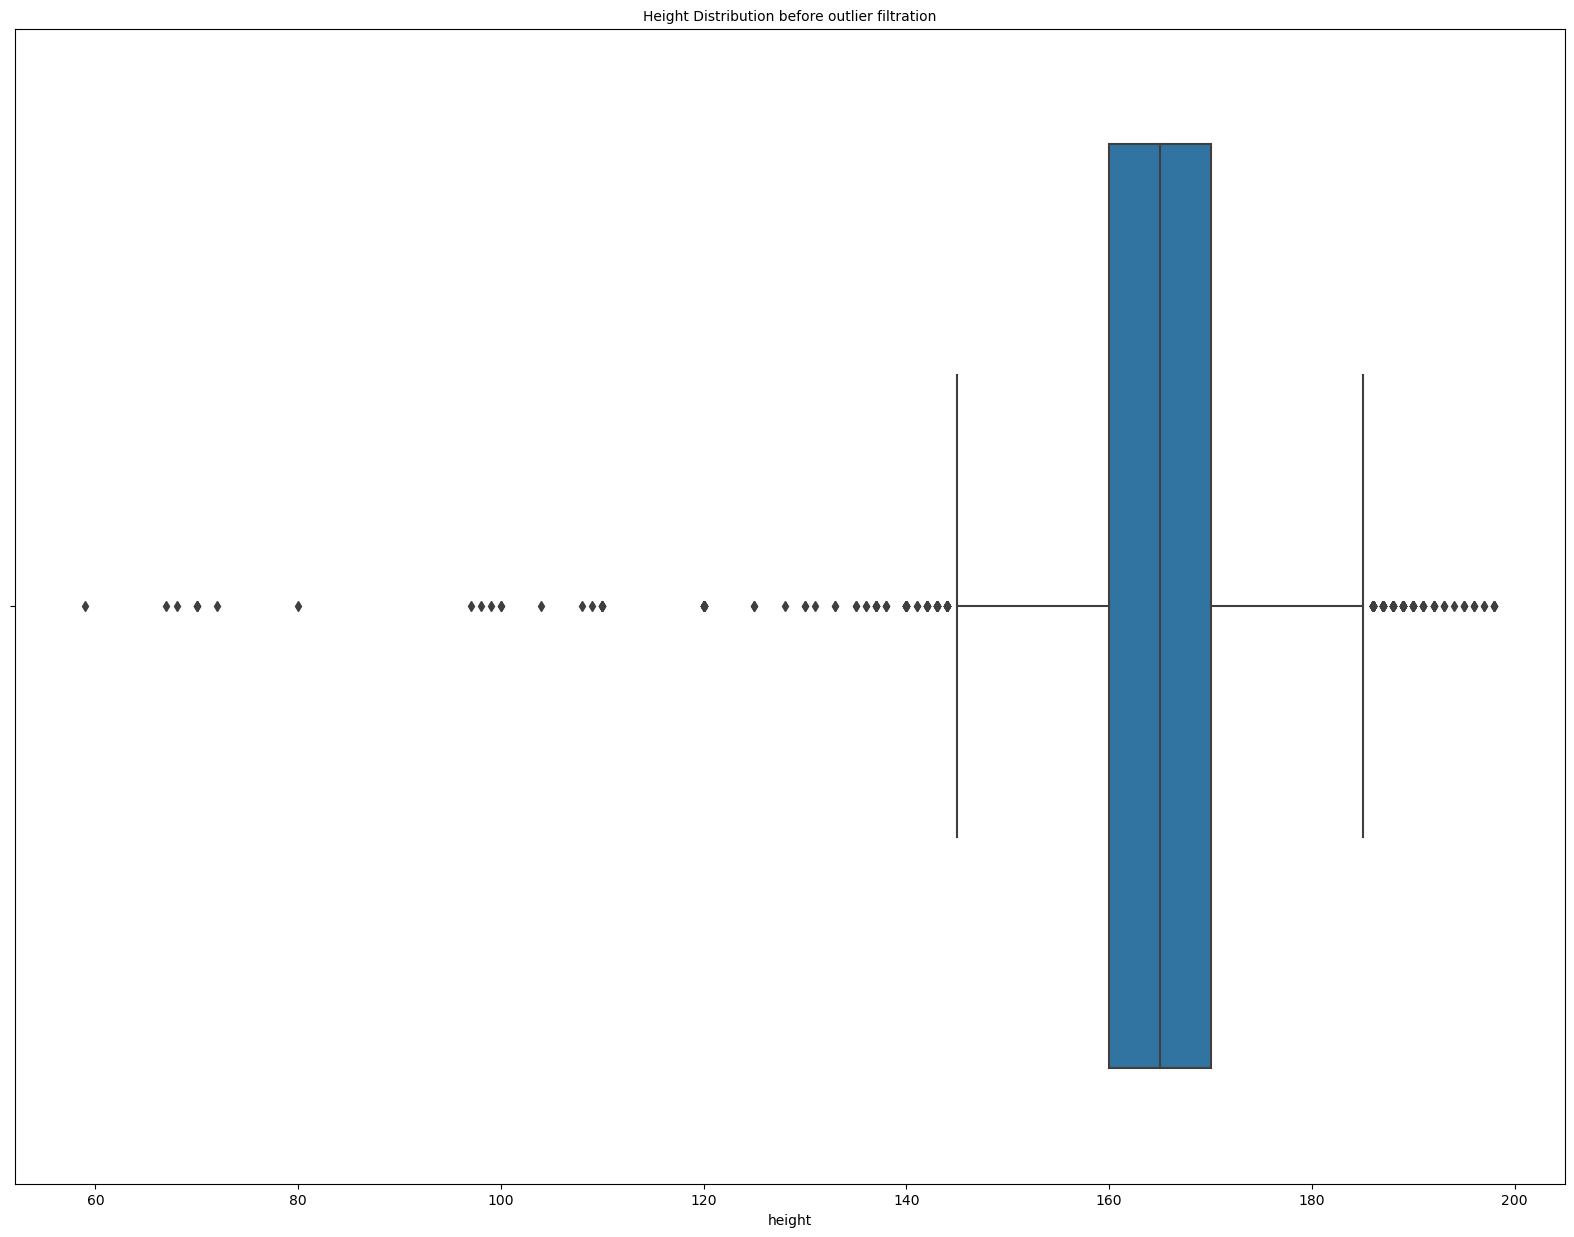

In [20]:
height_boxplot = sns.boxplot(x=target_df['height'])
height_boxplot.axes.set_title("Height Distribution before outlier filtration", fontsize=10)
plt.show()

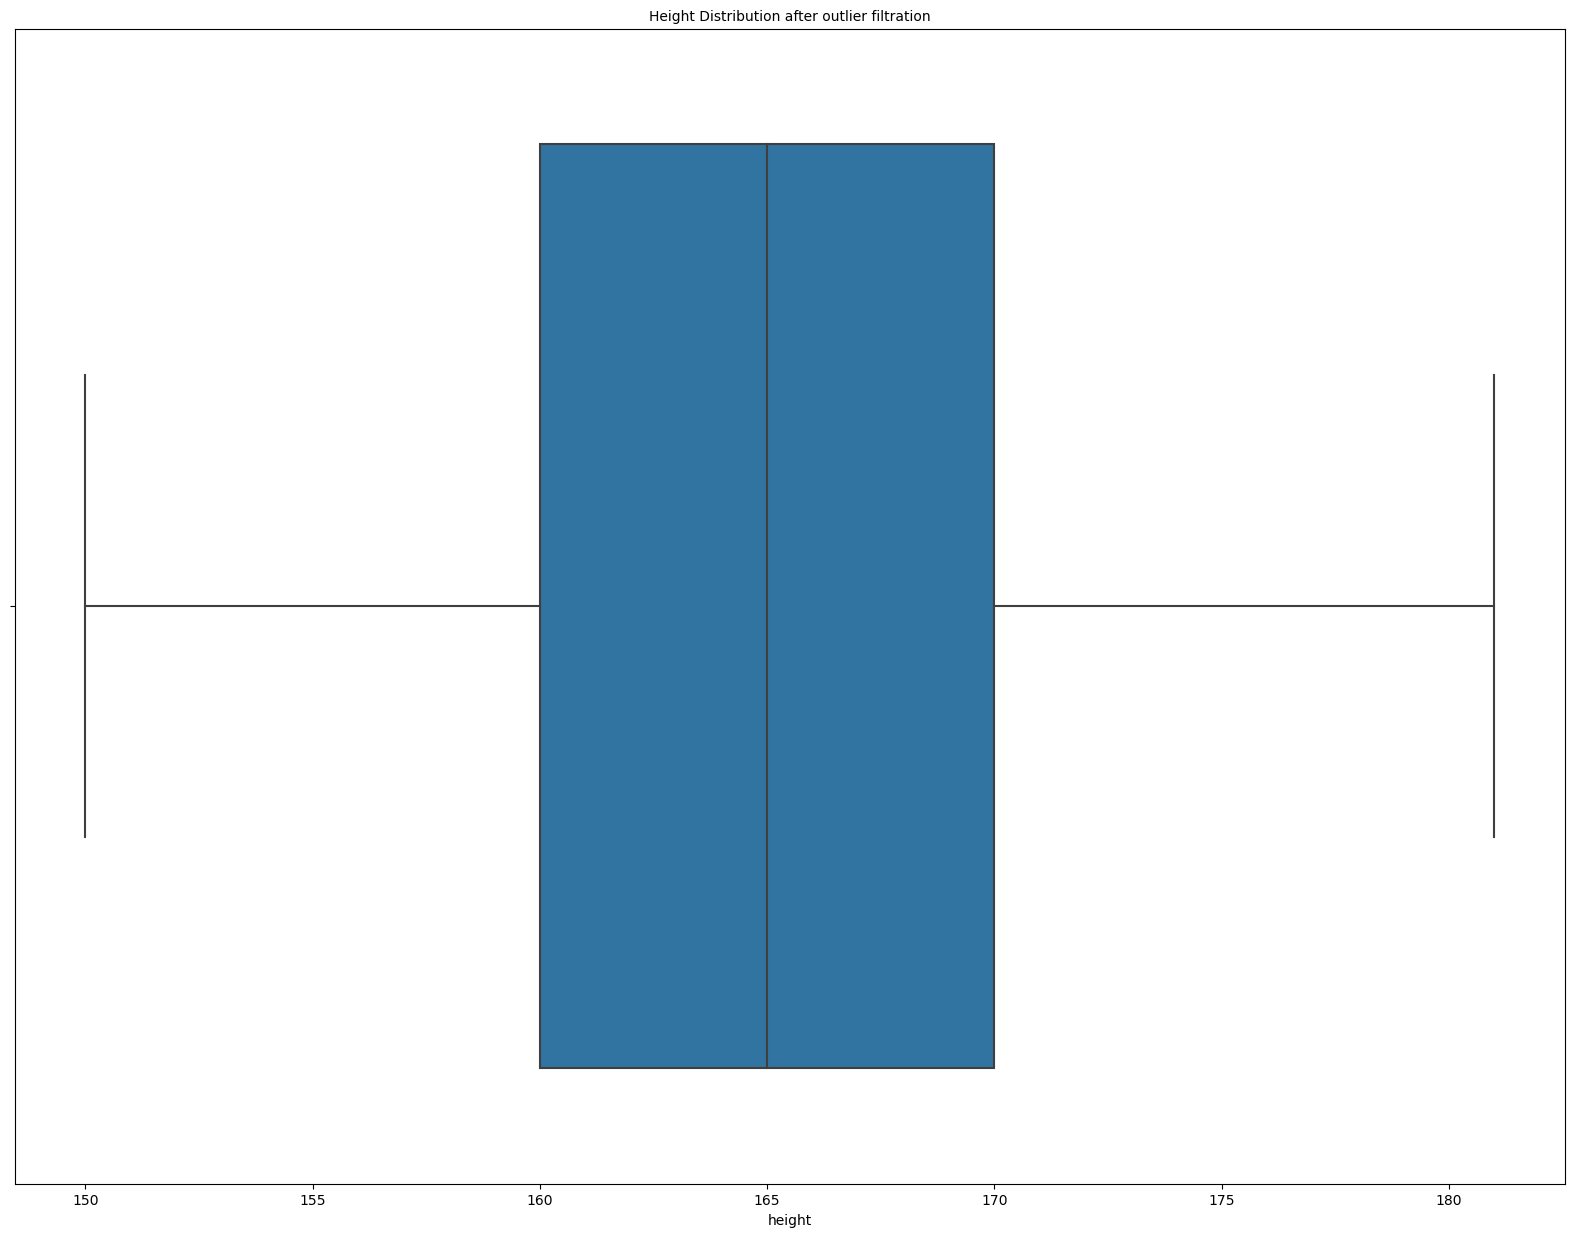

In [21]:
height_boxplot = sns.boxplot(x=filtered['height'])
height_boxplot.axes.set_title("Height Distribution after outlier filtration", fontsize=10)
plt.show()

In [22]:
# Checking whether diastolic blood pressure is greater than systolic blood pressure
# There are 1082 cases having diastolic blood pressure is greater than systolic blood pressure
higher_diastolic = filtered['diastolic']> filtered['systolic']
higher_diastolic.sum()

318

In [23]:
# Removing outliers from the dataset for diastolic and systolic that fall below 2.5 and above 97.5 percentile of a given range.
filtered.drop(filtered[(filtered['diastolic'] > filtered['diastolic'].quantile(0.975))].index, inplace=True)
filtered.drop(filtered[(filtered['diastolic'] < filtered['diastolic'].quantile(0.025))].index, inplace=True)
filtered.drop(filtered[(filtered['systolic'] > filtered['systolic'].quantile(0.975))].index, inplace=True)
filtered.drop(filtered[(filtered['systolic'] < filtered['systolic'].quantile(0.025))].index, inplace=True)
        

In [24]:
higher_diastolic = filtered['diastolic']> filtered['systolic']
higher_diastolic.sum()

0

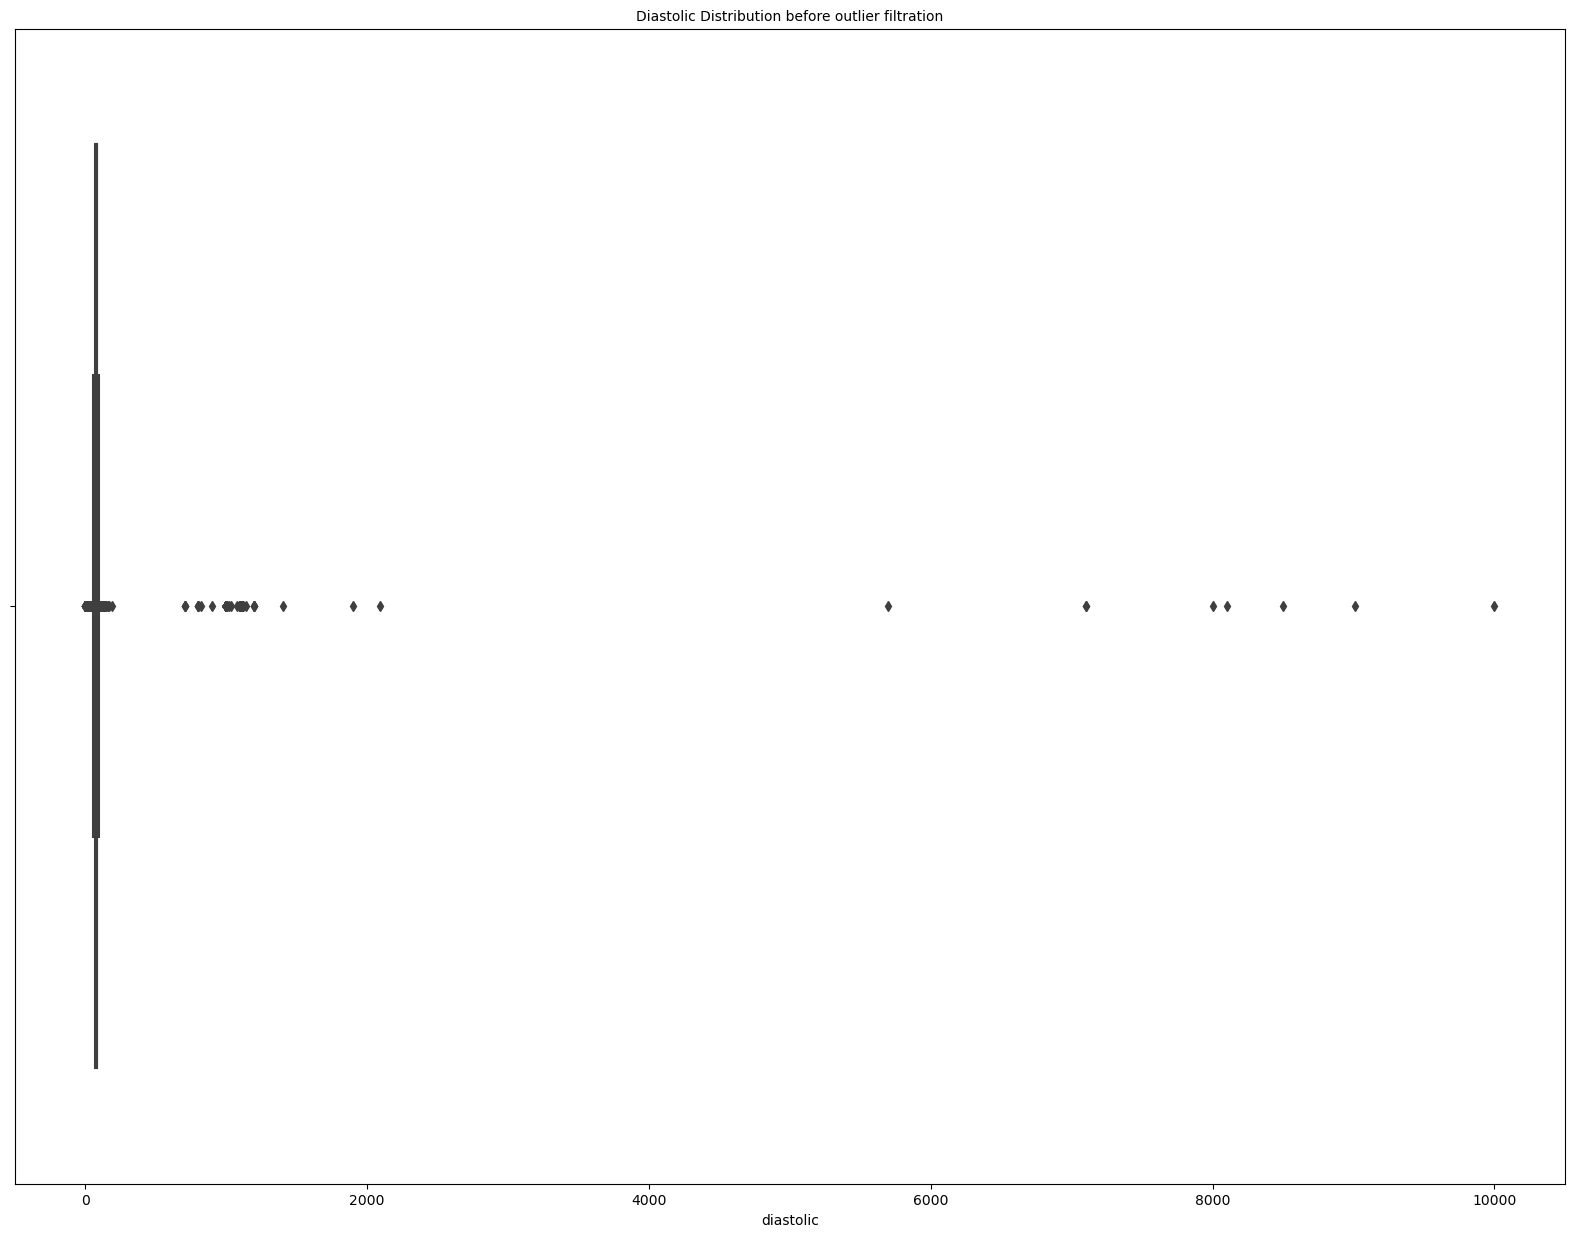

In [25]:
diastolic_boxplot = sns.boxplot(x=target_df['diastolic'])
diastolic_boxplot.axes.set_title("Diastolic Distribution before outlier filtration", fontsize=10)
plt.show()

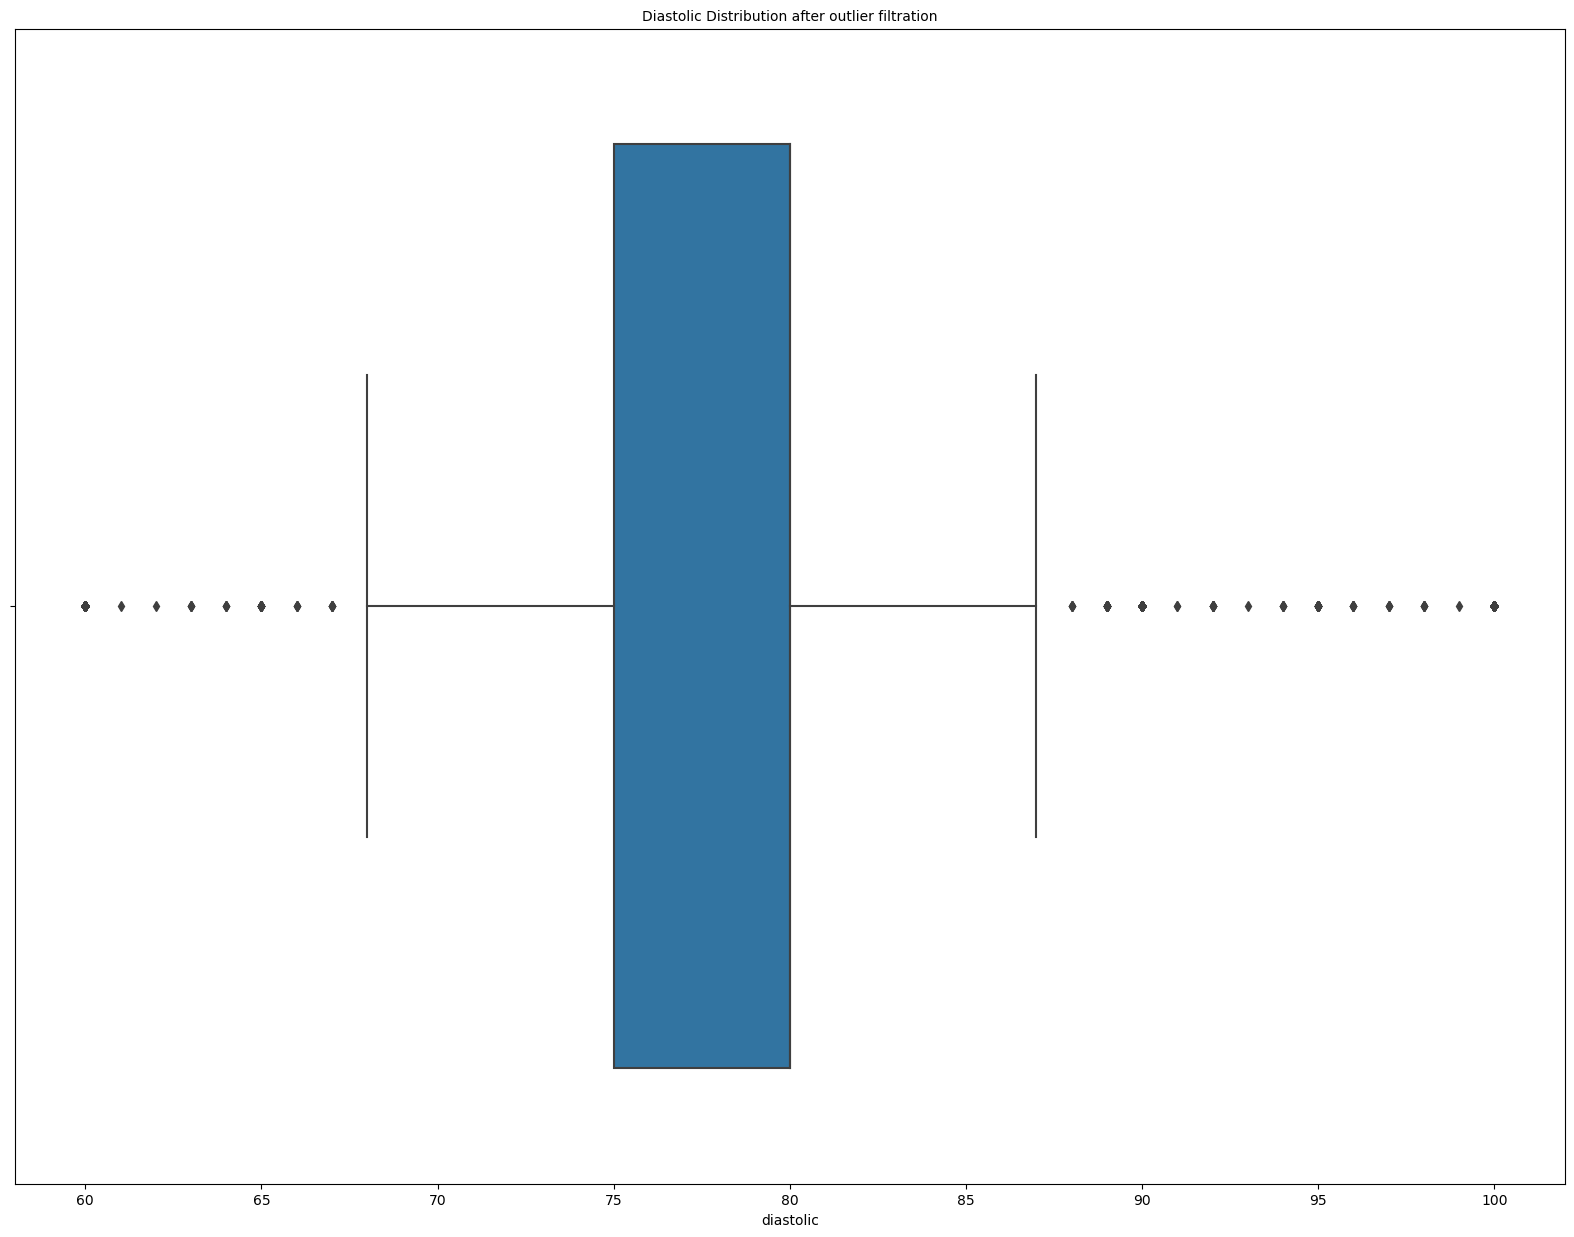

In [26]:
diastolic_boxplot = sns.boxplot(x=filtered['diastolic'])
diastolic_boxplot.axes.set_title("Diastolic Distribution after outlier filtration", fontsize=10)
plt.show()

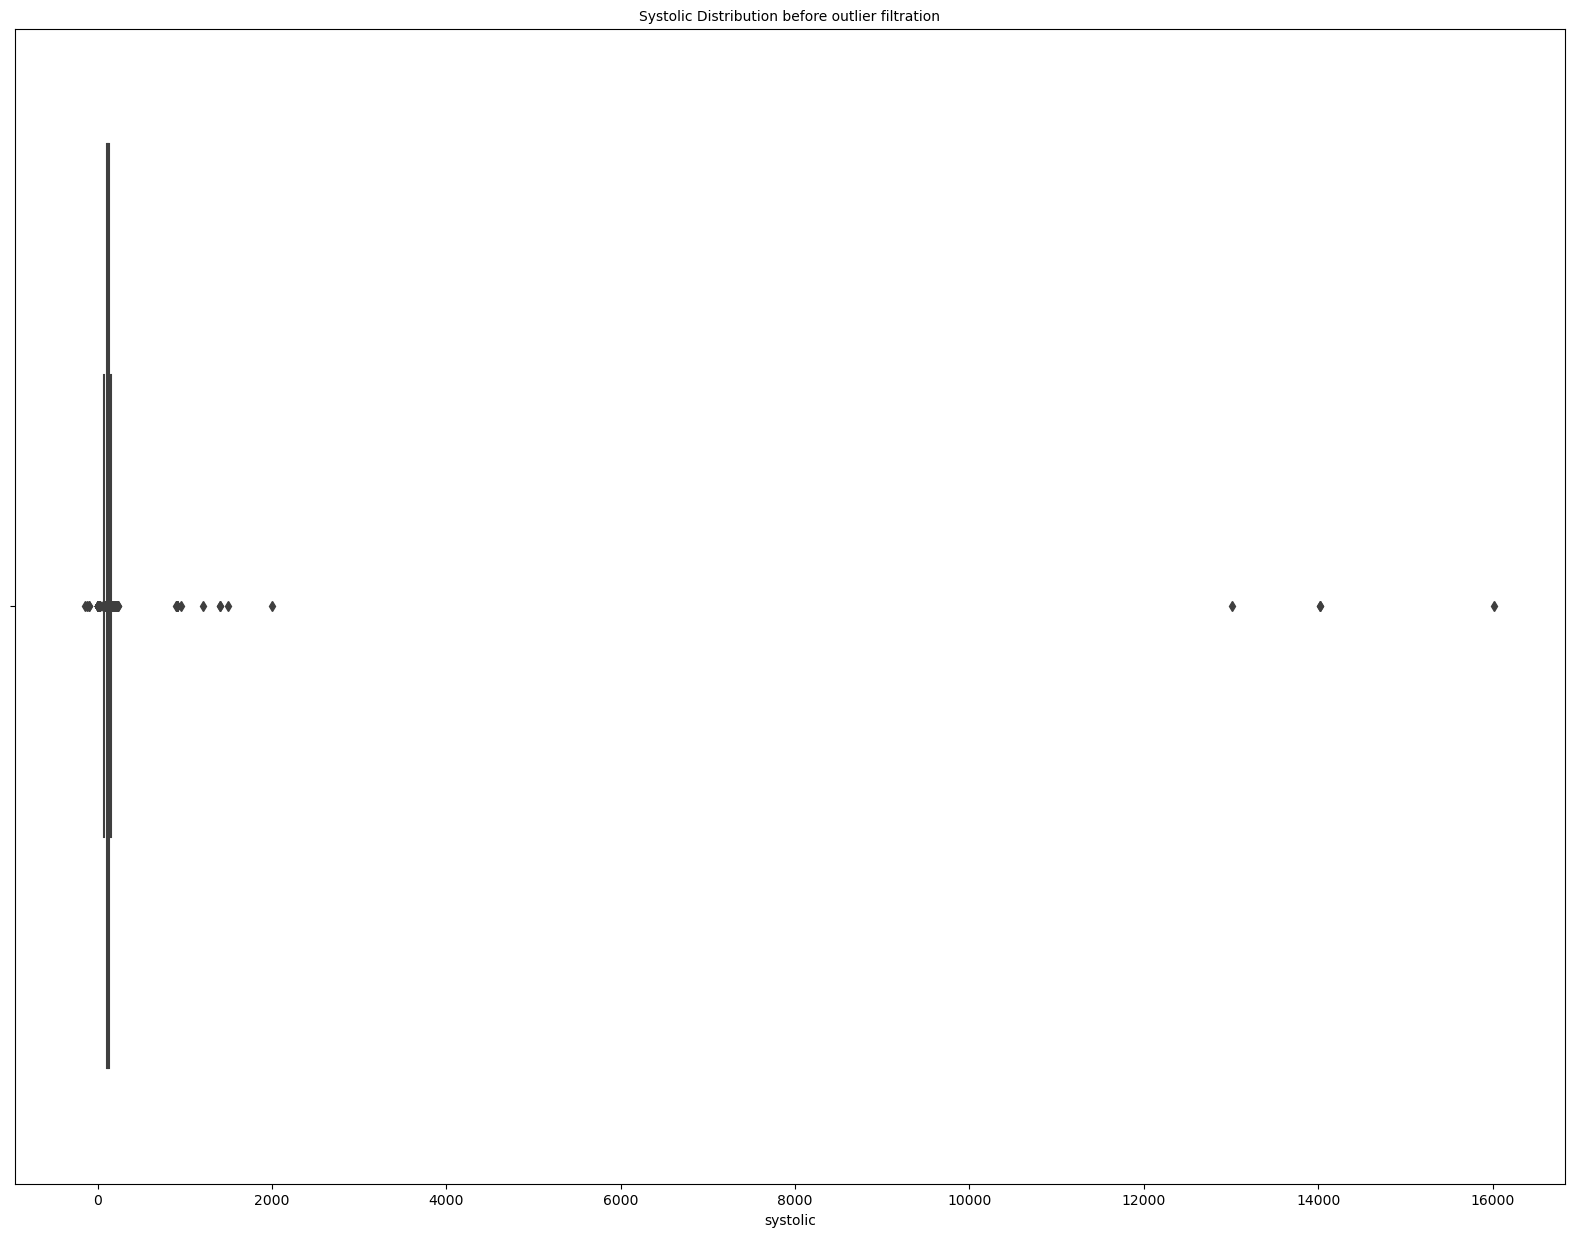

In [27]:
systolic_boxplot = sns.boxplot(x=target_df['systolic'])
systolic_boxplot.axes.set_title("Systolic Distribution before outlier filtration", fontsize=10)
plt.show()

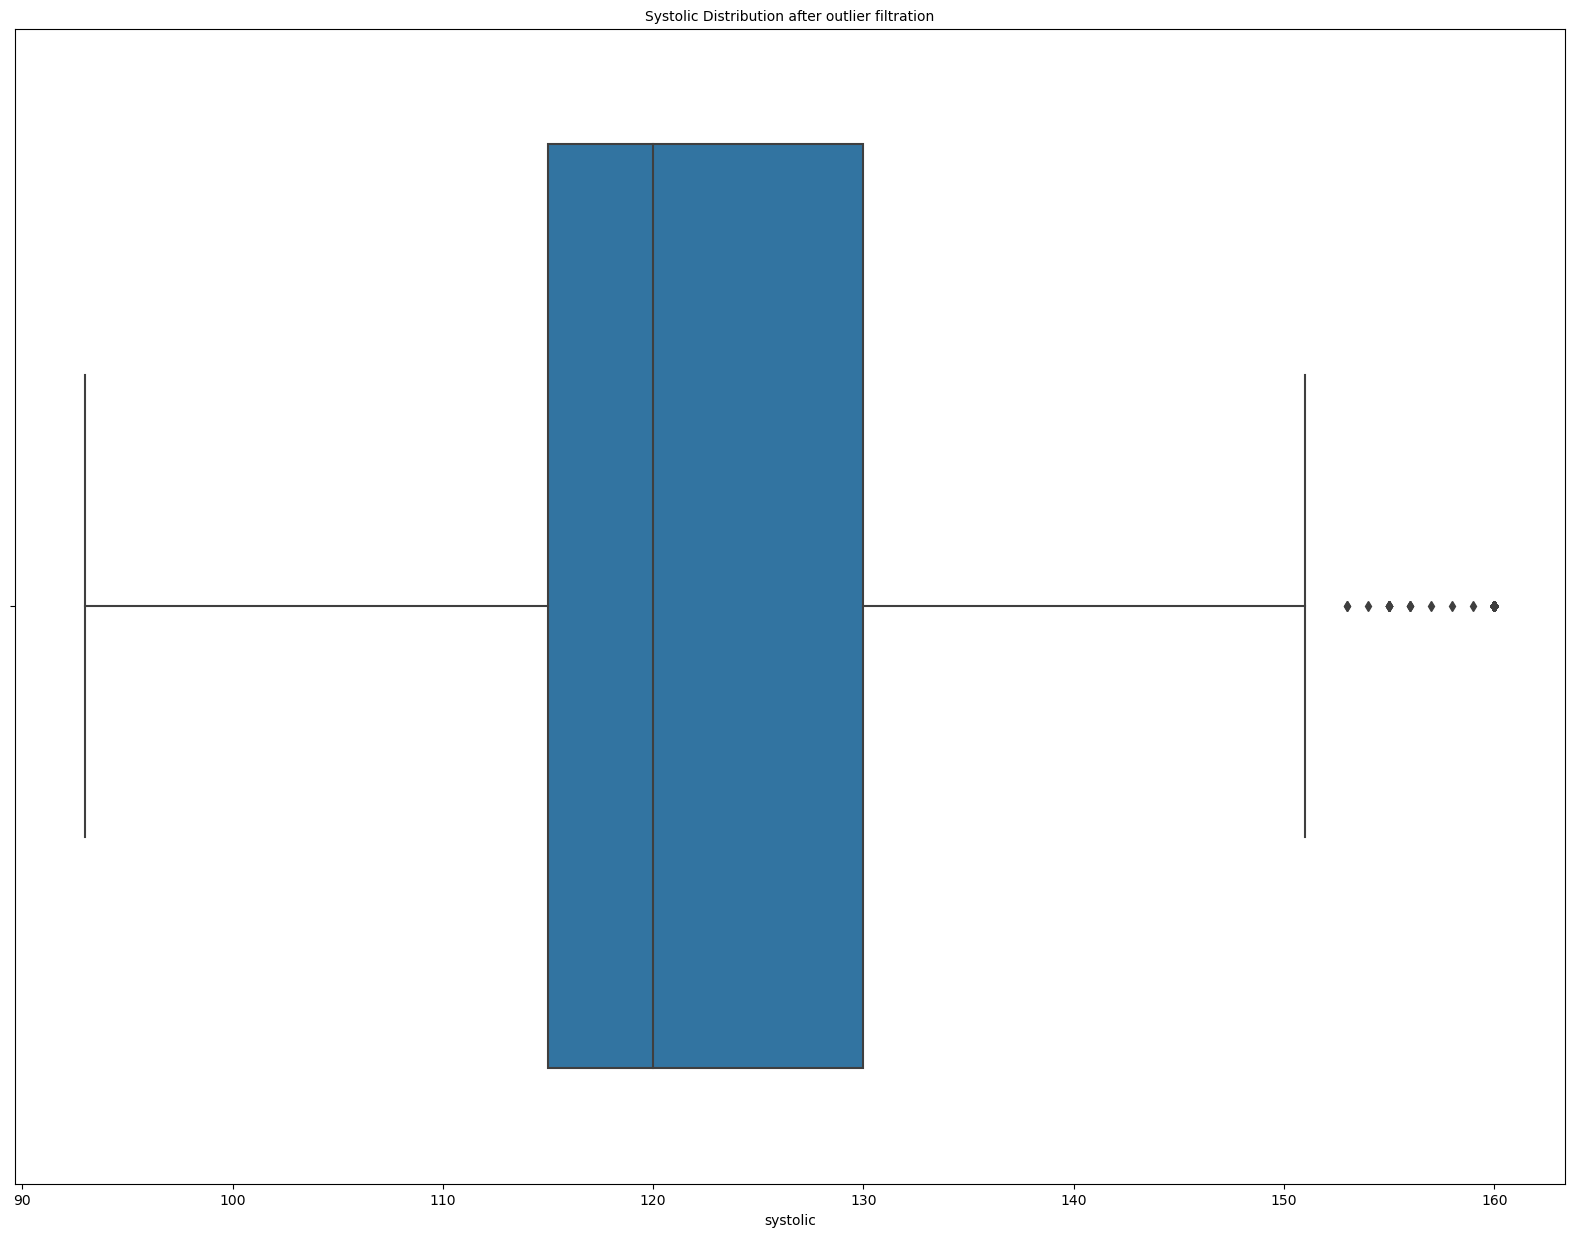

In [28]:
systolic_boxplot = sns.boxplot(x=filtered['systolic'])
systolic_boxplot.axes.set_title("Systolic Distribution after outlier filtration", fontsize=10)
plt.show()

In [29]:
filtered.describe()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular_disease,bmi,pulse_pressure
count,21314.000000,21314.000000,21314.000000,21314.000000,21314.00000,21314.000000,21314.000000,21314.000000,21314.000000,21314.000000,21314.000000,21314.000000,21314.000000,21314.000000
mean,45.219574,0.371634,165.234963,72.489691,122.56545,79.612039,1.236980,1.157361,0.101858,0.059257,0.810500,0.359576,26.585516,42.953411
std,3.592602,0.483253,6.825008,11.639235,13.20932,8.321635,0.544204,0.474578,0.302468,0.236110,0.391914,0.479887,4.257065,9.323283
min,30.000000,0.000000,150.000000,51.000000,93.00000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.740000,0.000000
25%,42.000000,0.000000,160.000000,64.000000,115.00000,75.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.530000,40.000000
50%,46.000000,0.000000,165.000000,70.000000,120.00000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,25.640000,40.000000
75%,49.000000,1.000000,170.000000,80.000000,130.00000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,29.000000,50.000000
max,50.000000,1.000000,181.000000,106.000000,160.00000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,45.450000,100.000000


In [30]:
# Post data cleaning of the target population, 21314 of 70000 records are available
target_df = filtered.copy()
target_df.shape

(21314, 14)

# Exploratory Data Analysis

In [31]:
# Counting the number and males and females
# male = 2, female = 1
target_df['gender'].value_counts()

0    13393
1     7921
Name: gender, dtype: int64

In [32]:
# Average bmi in males and females
target_df.groupby('gender')['bmi'].mean()

gender
0    26.959414
1    25.953320
Name: bmi, dtype: float64

In [33]:
target_df.age.describe()

count    21314.000000
mean        45.219574
std          3.592602
min         30.000000
25%         42.000000
50%         46.000000
75%         49.000000
max         50.000000
Name: age, dtype: float64

<AxesSubplot:ylabel='Frequency'>

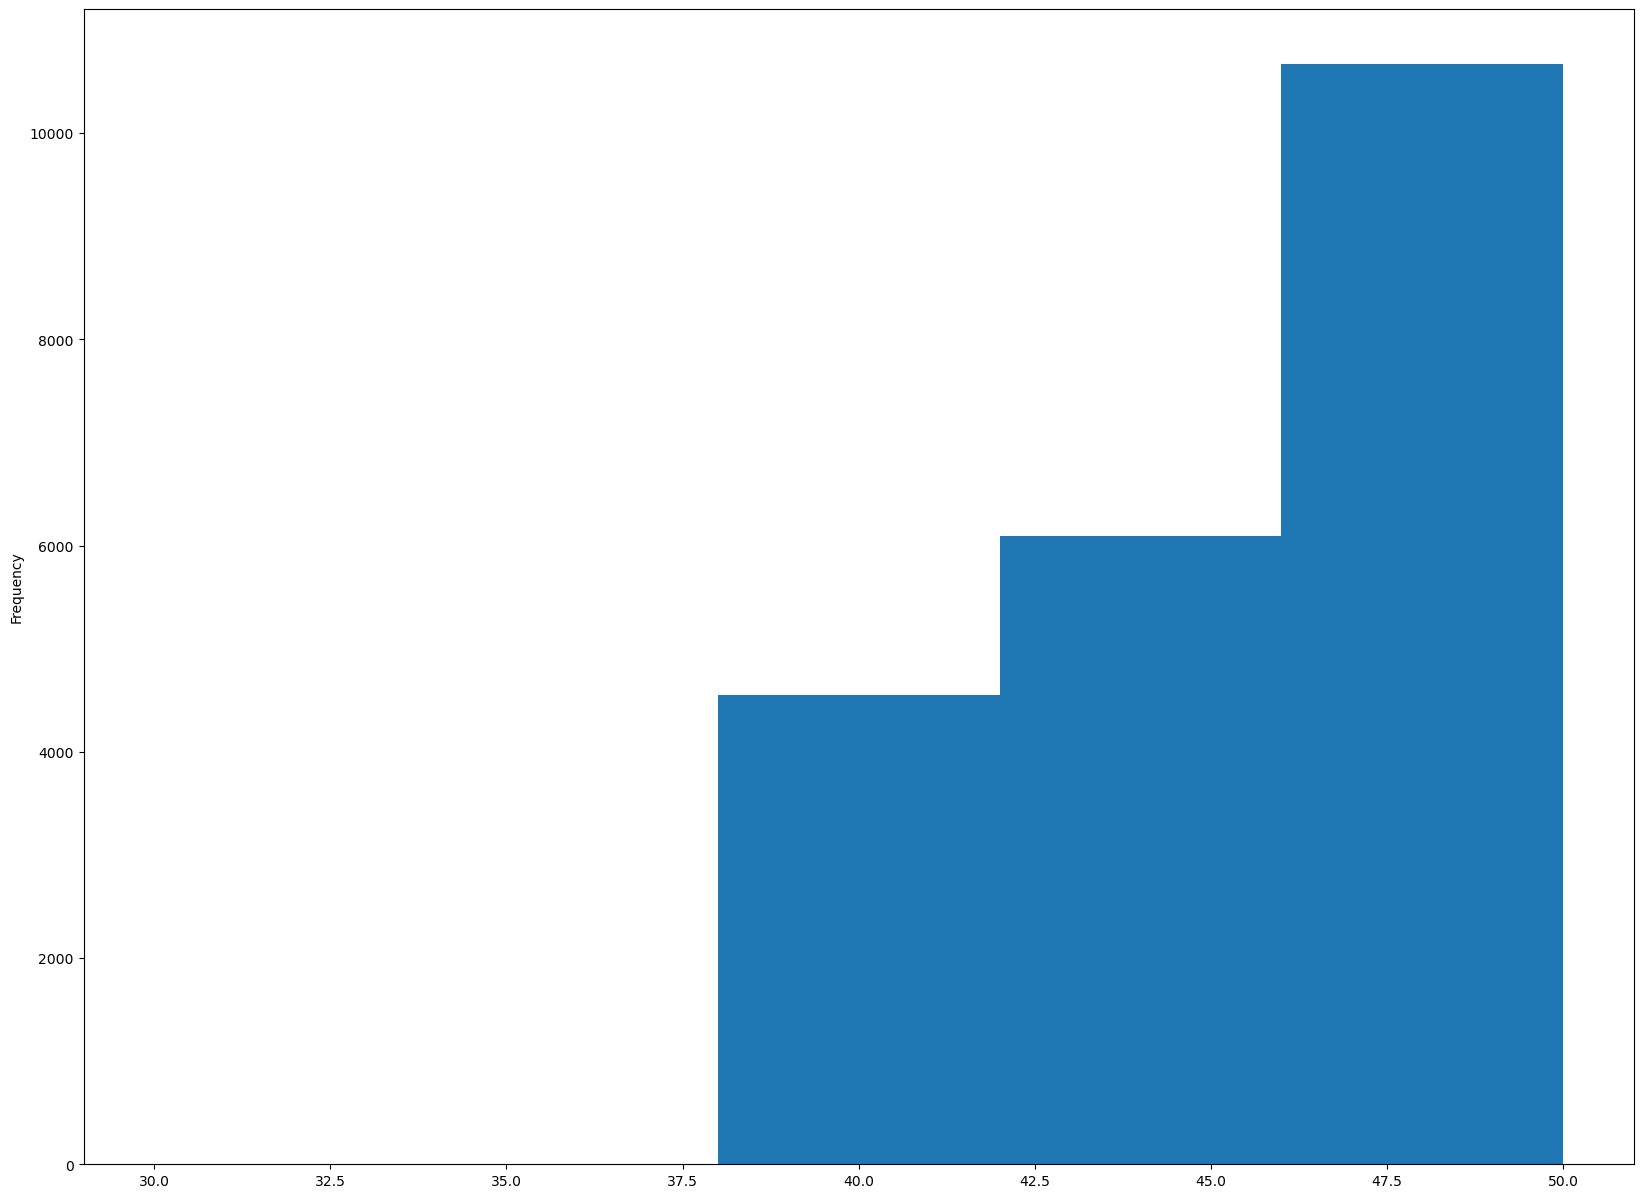

In [34]:
target_df.age.plot(kind='hist', bins=5)

In [35]:
target_df['cardiovascular_disease'].value_counts() 

0    13650
1     7664
Name: cardiovascular_disease, dtype: int64

In [36]:
# Total no of men in our target population without CVD
# male = 2, female = 1
target_df [(target_df['cardiovascular_disease'] == 0) & (target_df['gender'] == 2 )]

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular_disease,bmi,pulse_pressure


In [37]:
# Total no of women in our target population without CVD
# male = 2, female = 1
target_df [(target_df['cardiovascular_disease'] == 0) & (target_df['gender'] == 1 )]


,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular_disease,bmi,pulse_pressure
0,50,1,168,62.0,110,80,1,1,0,0,1,0,21.97,30
12,40,1,165,60.0,120,80,1,1,0,0,0,0,22.04,40
14,39,1,181,95.0,130,90,1,1,1,1,1,0,29.00,40
28,39,1,166,66.0,120,80,1,1,0,0,1,0,23.95,40
36,50,1,175,95.0,120,80,1,1,0,0,1,0,31.02,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69957,42,1,166,90.0,120,80,1,1,1,0,1,0,32.66,40
69965,42,1,165,66.0,120,80,1,1,0,0,0,0,24.24,40
69968,44,1,157,61.0,110,90,1,1,0,0,1,0,24.75,20
69980,48,1,167,69.0,110,80,1,1,0,1,0,0,24.74,30


In [38]:
target_df.to_csv('preprocessed_dataset.csv', index=None)

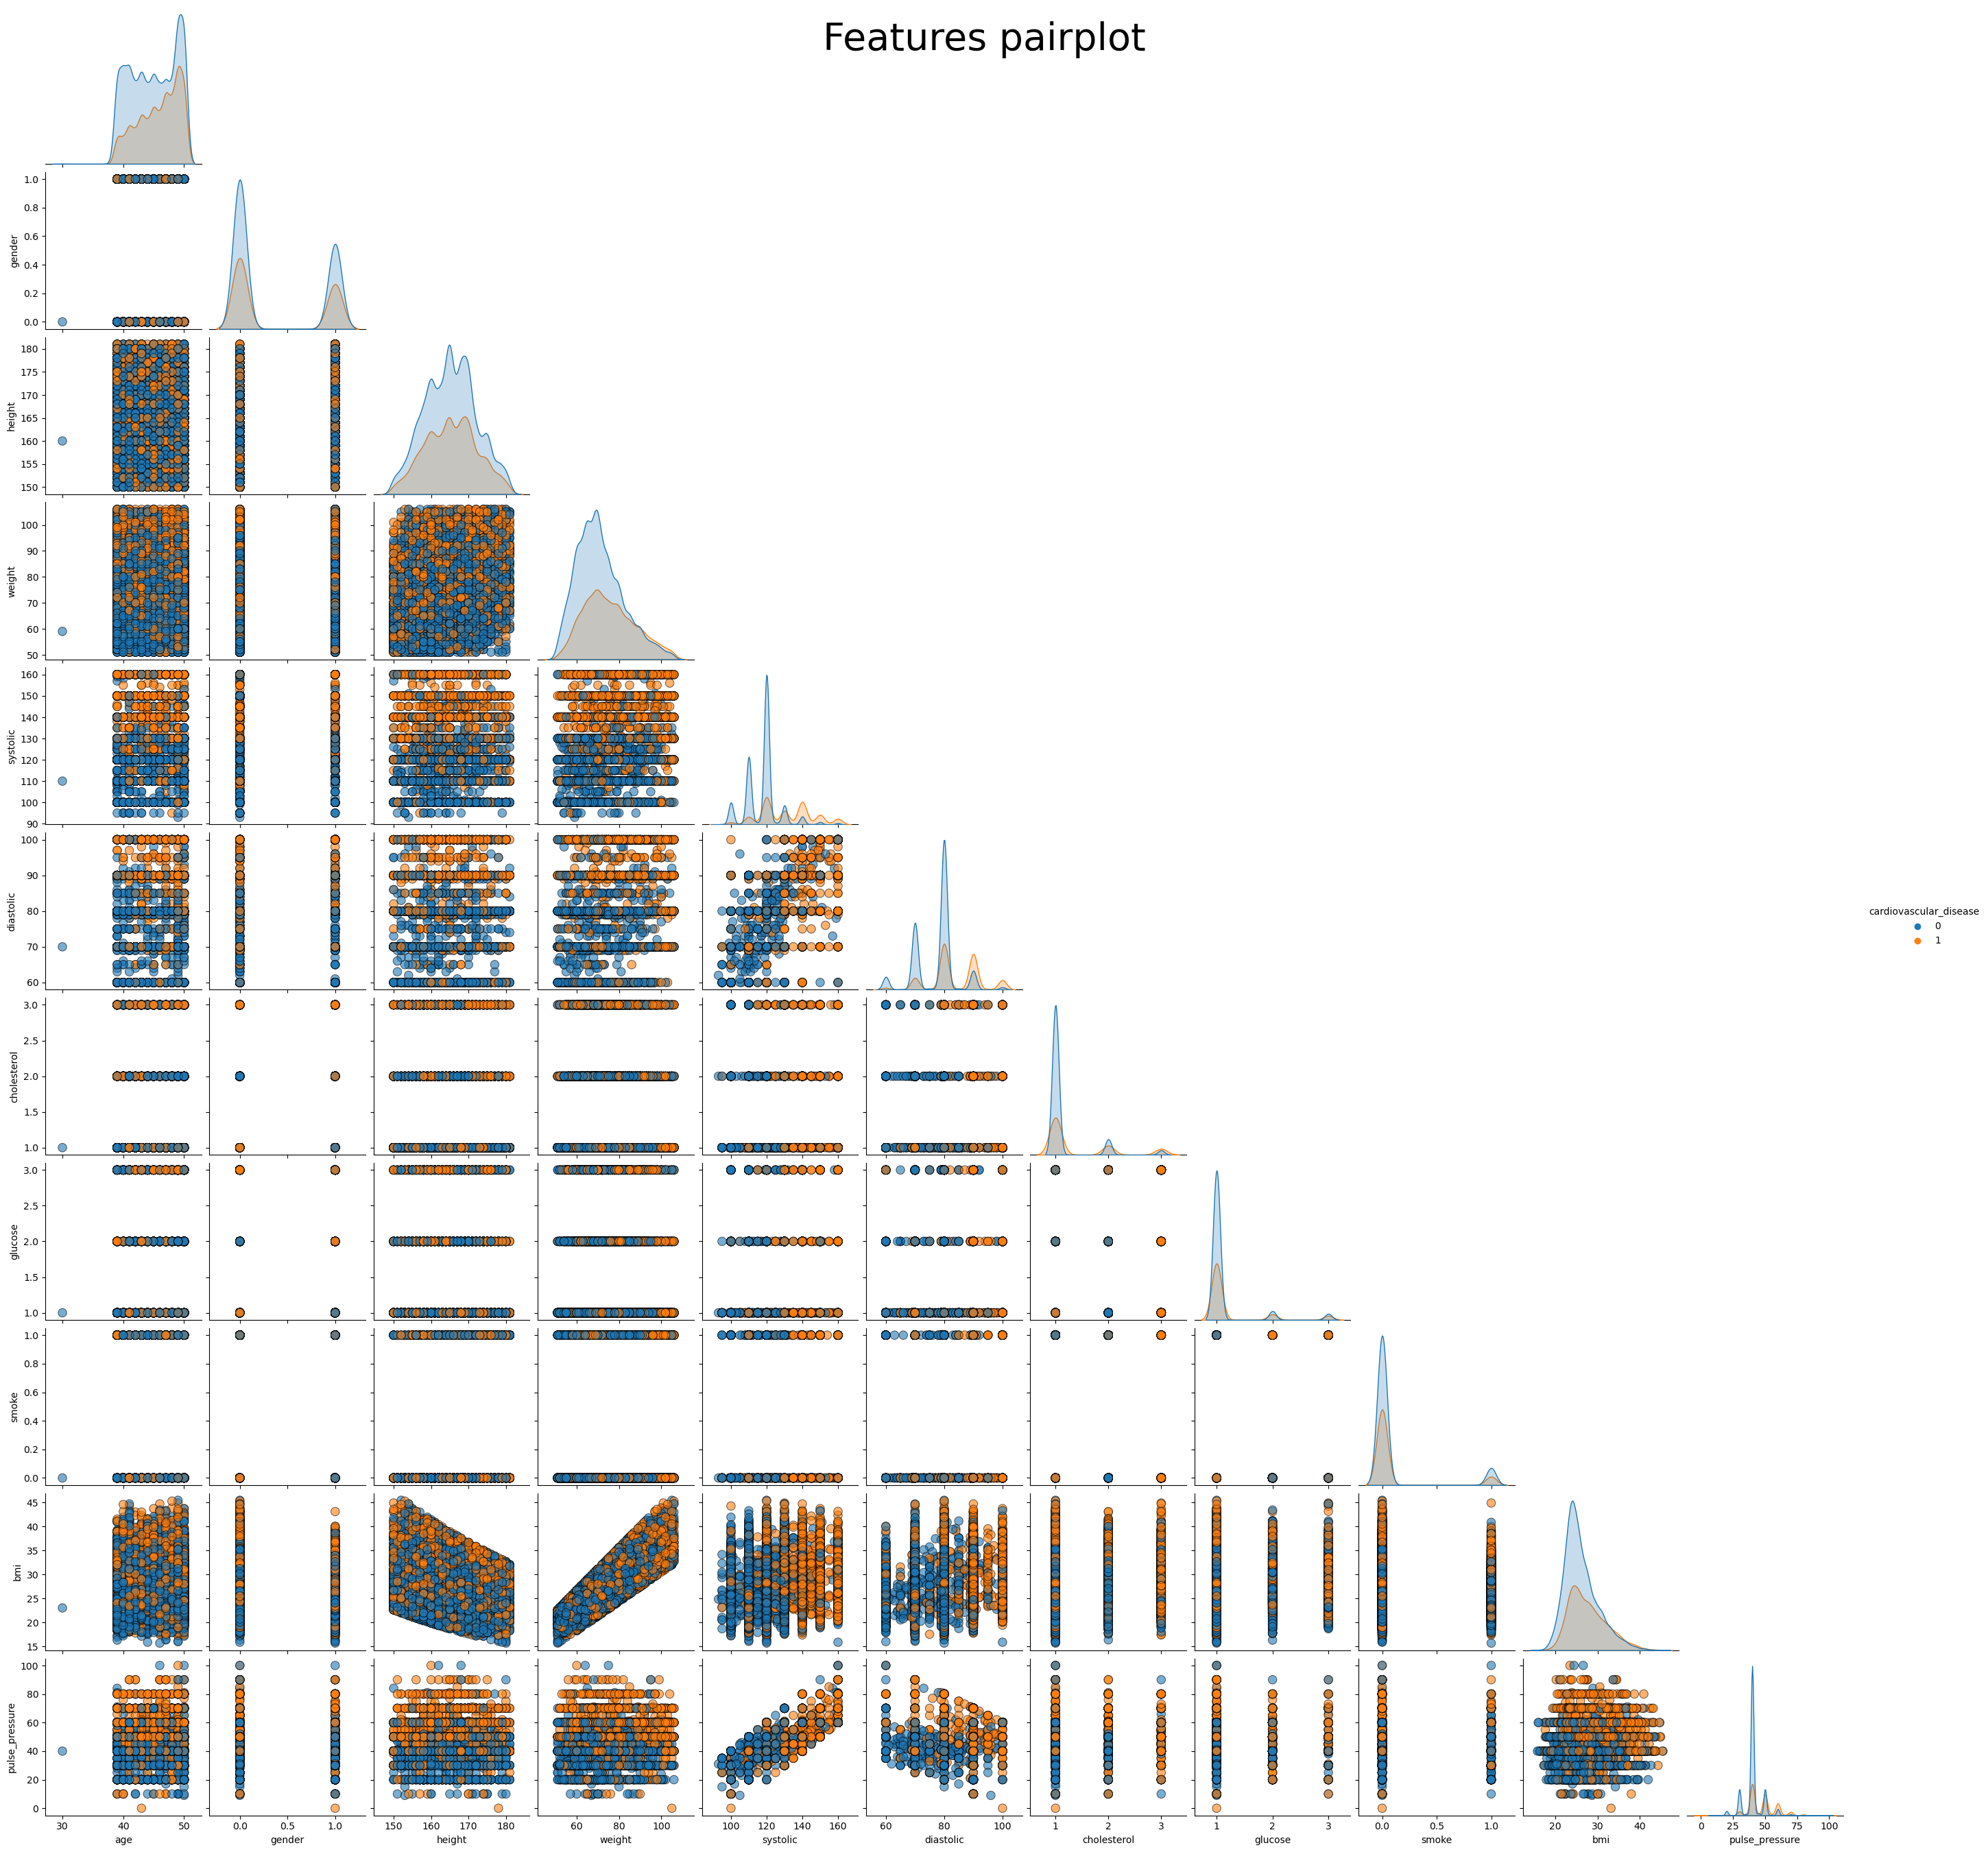

In [39]:
features = ['age', 'gender', 'height', 'weight', 'systolic', 'diastolic', 'cholesterol','glucose','smoke','cardiovascular_disease', 'bmi', 'pulse_pressure']
data = target_df[features]
g = sns.pairplot(data, hue="cardiovascular_disease", corner=True, diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})
plt.suptitle('Features pairplot' ,fontsize = 40);

# Building the Models

In [40]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC


from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix, make_scorer, classification_report
# from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve


In [41]:
df = pd.read_csv('preprocessed_dataset.csv')
df.head(5)
# On using the extracted features: bmi and pulse_pressure, the accuracy of the model is ~69%, so we have not used it
X = df[['age', 'gender', 'cholesterol', 'glucose', 'smoke', 'alcohol', 'active', 'height', 'weight', 'systolic', 'diastolic']]
y = df[['cardiovascular_disease']]

In [42]:
# Split your dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# A. Extreme Gradient Boosting classifier






In [43]:
# Created XGBoost object
XGb_classifier = GradientBoostingClassifier(n_estimators=50, learning_rate=1)

# Training the model using adaboost classifier
train_model = XGb_classifier.fit(X_train, y_train)

# Predicting for test data
y_pred = train_model.predict(X_test)

In [44]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)
AUC = roc_auc_score(y_test, y_pred)
print(AUC)

0.7844241144733756
0.738345543970247


In [45]:
# number of base estimators or weak learners we want to use
# learning_rate parameter is provided to shrink the contribution of each classifier. 
hyperparameters = {'n_estimators':[250,450,650,850,1000], 'learning_rate': [0.001, 0.01, 0.1, 1,10]}
grid_search = GridSearchCV(estimator= XGb_classifier, param_grid=hyperparameters, cv=10, scoring='accuracy')



In [47]:
posttuning_result = grid_search.fit(X_train, y_train)
GridSearchCV(cv=10, estimator=GradientBoostingClassifier(learning_rate=1),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [200,400,600,800]},
             scoring='accuracy')

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(learning_rate=1),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [200, 400, 600, 800]},
             scoring='accuracy')

In [48]:
grid_search_cv_results = pd.DataFrame(posttuning_result.cv_results_)
grid_search_cv_results[['params', 'mean_test_score']]

,params,mean_test_score
0,"{'learning_rate': 0.001, 'n_estimators': 250}",0.640314
1,"{'learning_rate': 0.001, 'n_estimators': 450}",0.772682
2,"{'learning_rate': 0.001, 'n_estimators': 650}",0.773268
3,"{'learning_rate': 0.001, 'n_estimators': 850}",0.777081
4,"{'learning_rate': 0.001, 'n_estimators': 1000}",0.778019
5,"{'learning_rate': 0.01, 'n_estimators': 250}",0.786992
6,"{'learning_rate': 0.01, 'n_estimators': 450}",0.787285
7,"{'learning_rate': 0.01, 'n_estimators': 650}",0.788106
8,"{'learning_rate': 0.01, 'n_estimators': 850}",0.788693
9,"{'learning_rate': 0.01, 'n_estimators': 1000}",0.788693


In [49]:
# Evaluate the accuracy of the model
print("Best Accuracy:", posttuning_result.best_score_)
print("Best parameters:", posttuning_result.best_params_)
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))


Best Accuracy: 0.7886929003379481
Best parameters: {'learning_rate': 0.01, 'n_estimators': 1000}
Precision: 0.7665505226480837
Recall: 0.5747877204441542
F1 Score: 0.6569615528182158


## Feature Analysis for Extreme Gradient Boosting

In [50]:
feature_importance = permutation_importance(XGb_classifier, X_test, y_test, n_jobs=-1)
feature_importance

{'importances_mean': array([0.00408163, 0.00225194, 0.03087028, 0.00384706, 0.00201736,
        0.00136054, 0.00206427, 0.00516068, 0.01018062, 0.16697162,
        0.02139338]),
 'importances_std': array([0.00124657, 0.00153177, 0.00227721, 0.00096832, 0.00114535,
        0.00037532, 0.00071767, 0.00157009, 0.00236725, 0.00268444,
        0.00199817]),
 'importances': array([[0.00164204, 0.00469153, 0.00492611, 0.00422238, 0.00492611],
        [0.00445696, 0.00093831, 0.00093831, 0.00375323, 0.00117288],
        [0.02674173, 0.03072953, 0.03213699, 0.03119869, 0.03354445],
        [0.00234577, 0.0030495 , 0.00445696, 0.00469153, 0.00469153],
        [0.00281492, 0.00375323, 0.00140746, 0.00046915, 0.00164204],
        [0.00187661, 0.00093831, 0.00164204, 0.00140746, 0.00093831],
        [0.00281492, 0.00140746, 0.0030495 , 0.00164204, 0.00140746],
        [0.00492611, 0.00539526, 0.00750645, 0.00258034, 0.00539526],
        [0.01243256, 0.01079052, 0.01055595, 0.01149425, 0.00562984],


In [51]:
args = feature_importance.importances_mean.argsort()
args

array([ 5,  4,  6,  1,  3,  0,  7,  8, 10,  2,  9])

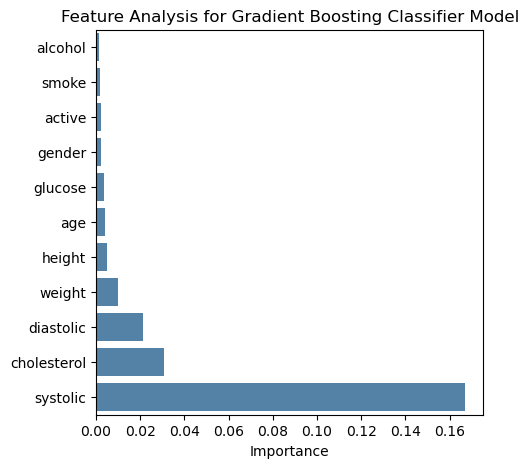

In [52]:
plt.figure(figsize=(5,5))
sns.barplot(y=X_test.columns[args], x=feature_importance.importances_mean[args], estimator=sum, orient="h", color= "steelblue")
plt.xlabel('Importance')
plt.title('Feature Analysis for Gradient Boosting Classifier Model')
plt.show()


# B. Random Forest

In [53]:
# Initializing RandomForestClassifier
rf_classifier = RandomForestClassifier()
# Training the Random Forest classifier model using the training dataset
train_model = rf_classifier.fit(X_train, y_train)

In [54]:
# Predicting for test data
y_pred = train_model.predict(X_test)

In [55]:
# Finding the accuracy score using the predicted labels and the actual test labels 
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.757213230119634

In [56]:
# Creating a dictionary of the hyperparameters and the range of values we want to use for tuning
# Dictionary 'key' is the name of the hyperparameter we want to tune
# Dictionary value is the range of values for the hyperparameter
# For this project we will tune the following parameters --
# 'n_estimators' - number of base estimators or weak learners we want to use
# 'max_depth' - the depth of the each decision tree in the forest
hyperparameters = {'n_estimators':[100,200,350,1000], 'max_depth': [3,5,7,9,11]}

In [57]:
# We are using GridSearchCV to tune the hyperparameters and cross validate
grid_search = GridSearchCV(estimator= rf_classifier, param_grid=hyperparameters, cv=10, scoring='accuracy')

In [58]:
grid_search_result = grid_search.fit(X, y)
grid_search_result

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'n_estimators': [100, 200, 350, 1000]},
             scoring='accuracy')

In [59]:
# Creating a dataframe of the GridSearchCV results
grid_search_cv_results = pd.DataFrame(grid_search_result.cv_results_)
# Displaying the relevant columns from the GridSearchCV results
grid_search_cv_results[['params', 'mean_test_score']]

,params,mean_test_score
0,"{'max_depth': 3, 'n_estimators': 100}",0.781411
1,"{'max_depth': 3, 'n_estimators': 200}",0.781505
2,"{'max_depth': 3, 'n_estimators': 350}",0.781177
3,"{'max_depth': 3, 'n_estimators': 1000}",0.781646
4,"{'max_depth': 5, 'n_estimators': 100}",0.784696
5,"{'max_depth': 5, 'n_estimators': 200}",0.784648
6,"{'max_depth': 5, 'n_estimators': 350}",0.785587
7,"{'max_depth': 5, 'n_estimators': 1000}",0.785071
8,"{'max_depth': 7, 'n_estimators': 100}",0.786854
9,"{'max_depth': 7, 'n_estimators': 200}",0.786244


In [60]:
# Evaluate the accuracy of the model
print("Best Accuracy:", grid_search_result.best_score_)
print("Best parameters:", grid_search_result.best_params_)
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))

Best Accuracy: 0.7872759884242527
Best parameters: {'max_depth': 7, 'n_estimators': 1000}
Precision: 0.6896024464831805
Recall: 0.589157413455258
F1 Score: 0.6354350123282846


## Feature Analysis for Random Forest


In [61]:
# We imported the permutation_importance module from sklearn. The permutation_importance module is indicative of how much the model 
# depends on a particular feature.
feature_importance = permutation_importance(rf_classifier, X_test, y_test, n_jobs=-1)
feature_importance


{'importances_mean': array([ 0.00178278,  0.00112597,  0.02472437, -0.0021581 , -0.00126671,
         0.00154821, -0.00408163,  0.00028149, -0.00441004,  0.15003519,
         0.002768  ]),
 'importances_std': array([0.00155317, 0.00190802, 0.00282117, 0.00096605, 0.00223821,
        0.00087268, 0.00083398, 0.00214686, 0.00232408, 0.00418205,
        0.00112401]),
 'importances': array([[ 0.00469153,  0.00140746,  0.00187661,  0.00046915,  0.00046915],
        [-0.00164204, -0.00070373,  0.00281492,  0.00281492,  0.00234577],
        [ 0.02345766,  0.02111189,  0.02932207,  0.02345766,  0.02627258],
        [-0.00258034, -0.00281492, -0.00258034, -0.00258034, -0.00023458],
        [-0.00234577,  0.00187661,  0.00023458, -0.00469153, -0.00140746],
        [ 0.00164204,  0.0030495 ,  0.00164204,  0.00046915,  0.00093831],
        [-0.00328407, -0.00422238, -0.00562984, -0.00375323, -0.00351865],
        [-0.00046915,  0.00164204, -0.00281492,  0.00351865, -0.00046915],
        [-0.0046915

In [62]:
# As seen above the 'importances_mean' key corresponds to the mean of importance of each feature
# We would like to sort the array to get the importances in an increasing order
# We can sort it using the sort() method, however we will use argsort() method which will sort the list of indices that would be present after sorting
# This argsort will be used to plot the features in an increasing order without actually sorting the data 
args = feature_importance.importances_mean.argsort()
args

array([ 8,  6,  3,  4,  7,  1,  5,  0, 10,  2,  9])

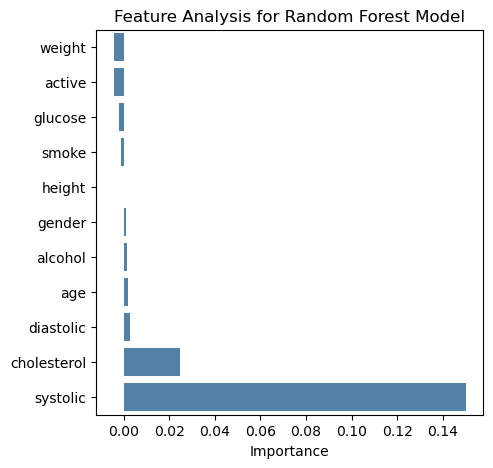

In [63]:
# Plotting the feature importance using the seaborn library
plt.figure(figsize=(5,5))
sns.barplot(y=X_test.columns[args], x=feature_importance.importances_mean[args], estimator=sum, orient="h", color= "steelblue")
plt.xlabel('Importance')
plt.title('Feature Analysis for Random Forest Model')
plt.show()


# C. Support Vector Machines


In [64]:
# Initialize your SVC model
clf = SVC(kernel='rbf',C=5)

In [65]:
# Train the model on the training set
clf.fit(X_train, y_train)


SVC(C=5)

In [66]:
# Make predictions on the testing set
y_pred = clf.predict(X_test)

In [67]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))

Accuracy: 0.7743373211353507
Precision: 0.8319719953325554
Recall: 0.46570868713259306
F1 Score: 0.5971524288107202


## Feature Analysis of SVM Classifier

In [68]:
# We imported the permutation_importance module from sklearn. The permutation_importance module is indicative of how much the model 
# depends on a particular feature.
feature_importance = permutation_importance(clf, X_test, y_test, n_jobs=-1)
feature_importance

{'importances_mean': array([ 0.        ,  0.        ,  0.00258034,  0.        ,  0.        ,
         0.        ,  0.        , -0.00018766,  0.00075065,  0.17846587,
         0.0045977 ]),
 'importances_std': array([0.        , 0.        , 0.00134345, 0.        , 0.        ,
        0.        , 0.        , 0.00017554, 0.00027356, 0.00405865,
        0.00087268]),
 'importances': array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.00093831,  0.00234577,  0.00375323,  0.00445696,  0.00140746],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [-0.00023458,  0.        , -0.00023458, -0.00046915,  0.        ],
        [ 0.0011728

In [69]:
# As seen above the 'importances_mean' key corresponds to the mean of importance of each feature
# We would like to sort the array to get the importances in an increasing order
# We can sort it using the sort() method, however we will use argsort() method which will sort the list of indices that would be present after sorting
# This argsort will be used to plot the features in an increasing order without actually sorting the data 
args = feature_importance.importances_mean.argsort()
args

array([ 7,  0,  1,  3,  4,  5,  6,  8,  2, 10,  9])

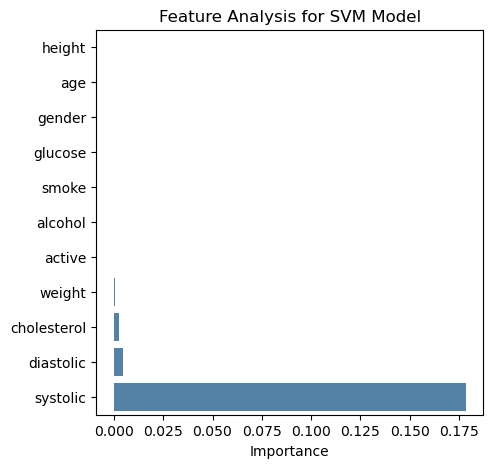

In [70]:
# Plotting the feature importance using the seaborn library
plt.figure(figsize=(5,5))
sns.barplot(y=X_test.columns[args], x=feature_importance.importances_mean[args], estimator=sum, orient="h", color= "steelblue")
plt.xlabel('Importance')
plt.title('Feature Analysis for SVM Model')
plt.show()

# D. Logistic Regression

In [71]:
# Initialize your logistic regression model
logreg = LogisticRegression()

In [72]:
# Train the model on the training set
logreg.fit(X_train, y_train)


LogisticRegression()

In [73]:
# Make predictions on the testing set
y_pred = logreg.predict(X_test)


In [74]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))

Accuracy: 0.7759793572601454
Precision: 0.7661737523105361
Recall: 0.5414761593729589
F1 Score: 0.6345197091465749


## Feature Analysis of Logistic Regression classifier

In [75]:
# We imported the permutation_importance module from sklearn. The permutation_importance module is indicative of how much the model 
# depends on a particular feature.
feature_importance = permutation_importance(logreg, X_test, y_test, n_jobs=-1)
feature_importance

{'importances_mean': array([-9.38306357e-05,  8.44475721e-03,  2.61318320e-02,  2.20501994e-03,
         1.45437485e-03,  9.38306357e-04,  1.21979826e-03,  1.32301196e-02,
         1.25733052e-02,  1.73399015e-01,  1.17288295e-03]),
 'importances_std': array([0.00038114, 0.00121437, 0.00363889, 0.00075065, 0.00037532,
        0.00053492, 0.00093124, 0.00394089, 0.00217841, 0.00426233,
        0.00046915]),
 'importances': array([[-0.00046915, -0.00023458,  0.00046915, -0.00046915,  0.00023458],
        [ 0.0079756 ,  0.00633357,  0.00914849,  0.00985222,  0.00891391],
        [ 0.03260615,  0.02697631,  0.02181562,  0.02416139,  0.0250997 ],
        [ 0.00234577,  0.00328407,  0.00211119,  0.00093831,  0.00234577],
        [ 0.00187661,  0.00117288,  0.00140746,  0.00093831,  0.00187661],
        [ 0.00140746,  0.00117288,  0.00070373,  0.        ,  0.00140746],
        [ 0.00140746,  0.00164204,  0.00234577,  0.00117288, -0.00046915],
        [ 0.00914849,  0.02064274,  0.01149425,  0

In [76]:
# As seen above the 'importances_mean' key corresponds to the mean of importance of each feature
# We would like to sort the array to get the importances in an increasing order
# We can sort it using the sort() method, however we will use argsort() method which will sort the list of indices that would be present after sorting
# This argsort will be used to plot the features in an increasing order without actually sorting the data 
args = feature_importance.importances_mean.argsort()
args

array([ 0,  5, 10,  6,  4,  3,  1,  8,  7,  2,  9])

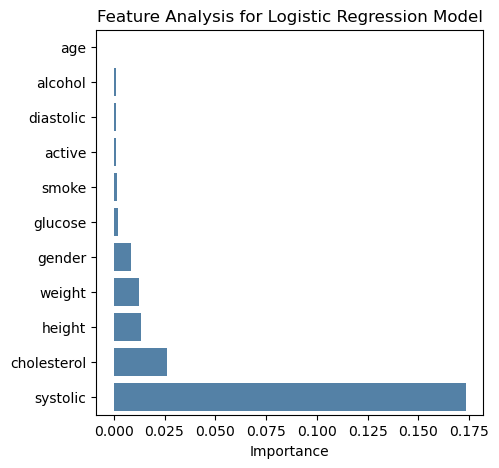

In [77]:
# Plotting the feature importance using the seaborn library
plt.figure(figsize=(5,5))
sns.barplot(y=X_test.columns[args], x=feature_importance.importances_mean[args], estimator=sum, orient="h", color= "steelblue")
plt.xlabel('Importance')
plt.title('Feature Analysis for Logistic Regression Model')
plt.show()

# E. AdaBoost Classifier

In [78]:
# Created adaboost object
ab_classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1)


In [79]:
# Training the model using adaboost classifier
train_model = ab_classifier.fit(X_train, y_train)


In [80]:
# Predicting for test data
y_pred = train_model.predict(X_test)

In [81]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.7891156462585034

In [82]:
# number of base estimators or weak learners we want to use
# learning_rate parameter is provided to shrink the contribution of each classifier. 
hyperparameters = {'n_estimators':[250,500,750], 'learning_rate': [0.01, 0.1, 1]}

In [83]:
grid_search = GridSearchCV(estimator= ab_classifier, param_grid=hyperparameters, cv=10, scoring='accuracy')

In [84]:
posttuning_result_1 = grid_search.fit(X, y)
posttuning_result_1

GridSearchCV(cv=10, estimator=AdaBoostClassifier(learning_rate=1),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [250, 500, 750]},
             scoring='accuracy')

In [85]:
grid_search_cv_results = pd.DataFrame(posttuning_result_1.cv_results_)
grid_search_cv_results[['params', 'mean_test_score']]

,params,mean_test_score
0,"{'learning_rate': 0.01, 'n_estimators': 250}",0.781083
1,"{'learning_rate': 0.01, 'n_estimators': 500}",0.780661
2,"{'learning_rate': 0.01, 'n_estimators': 750}",0.780473
3,"{'learning_rate': 0.1, 'n_estimators': 250}",0.782209
4,"{'learning_rate': 0.1, 'n_estimators': 500}",0.783335
5,"{'learning_rate': 0.1, 'n_estimators': 750}",0.783382
6,"{'learning_rate': 1, 'n_estimators': 250}",0.784086
7,"{'learning_rate': 1, 'n_estimators': 500}",0.783851
8,"{'learning_rate': 1, 'n_estimators': 750}",0.783945


In [86]:
print("Best Accuracy:", posttuning_result_1.best_score_)
print("Best parameters:", posttuning_result_1.best_params_)
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))

Best Accuracy: 0.7840857906557624
Best parameters: {'learning_rate': 1, 'n_estimators': 250}
Precision: 0.7836624775583483
Recall: 0.5702155453951666
F1 Score: 0.6601134215500944


## Feature Analysis of AdaBoost classifier

In [87]:
# We imported the permutation_importance module from sklearn. The permutation_importance module is indicative of how much the model 
# depends on a particular feature.
feature_importance = permutation_importance(ab_classifier, X_test, y_test, n_jobs=-1)
feature_importance

{'importances_mean': array([0.00501994, 0.        , 0.01238564, 0.00136054, 0.00075065,
        0.00093831, 0.00075065, 0.00093831, 0.00220502, 0.18418954,
        0.00351865]),
 'importances_std': array([0.00097962, 0.        , 0.00063639, 0.00040358, 0.00063639,
        0.00062944, 0.00076228, 0.00059344, 0.00222341, 0.0051658 ,
        0.0014384 ]),
 'importances': array([[ 0.00328407,  0.00539526,  0.00469153,  0.00562984,  0.00609899],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.01337087,  0.01196341,  0.01196341,  0.01172883,  0.01290171],
        [ 0.00140746,  0.00093831,  0.00211119,  0.00117288,  0.00117288],
        [ 0.00117288, -0.00046915,  0.00070373,  0.00117288,  0.00117288],
        [ 0.00070373,  0.        ,  0.00164204,  0.00164204,  0.00070373],
        [ 0.00046915,  0.00164204, -0.00023458,  0.00164204,  0.00023458],
        [ 0.00187661,  0.00093831,  0.00093831,  0.        ,  0.00093831],
        [-0.00211119,  0.00281

In [88]:
# As seen above the 'importances_mean' key corresponds to the mean of importance of each feature
# We would like to sort the array to get the importances in an increasing order
# We can sort it using the sort() method, however we will use argsort() method which will sort the list of indices that would be present after sorting
# This argsort will be used to plot the features in an increasing order without actually sorting the data 
args = feature_importance.importances_mean.argsort()
args

array([ 1,  4,  6,  5,  7,  3,  8, 10,  0,  2,  9])

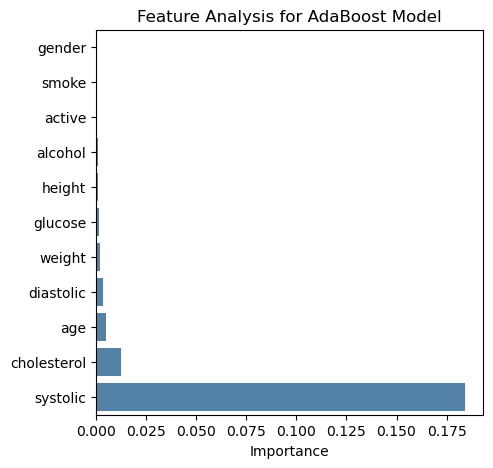

In [89]:
# Plotting the feature importance using the seaborn library
plt.figure(figsize=(5,5))
sns.barplot(y=X_test.columns[args], x=feature_importance.importances_mean[args], estimator=sum, orient="h", color= "steelblue")
plt.xlabel('Importance')
plt.title('Feature Analysis for AdaBoost Model')
plt.show()

# F. MLP

In [95]:

# Initializing MLPClassifier
mlp = MLPClassifier()

# Creating a dictionary of the hyperparameters and the range of values we want to use for tuning
activation = ['relu']
hidden_layer_sizes = [(10, 5), (20, 10), (5, 10), (10,), (5,), (15,)]
alpha = [0.0001, 0.001, 0.01, 0.1, 1]
parameters = {'activation': activation, 'hidden_layer_sizes': hidden_layer_sizes, 'alpha': alpha}
auc_scoring = make_scorer(roc_auc_score)

# We are using GridSearchCV to tune the hyperparameters and cross validate
grid_clf = GridSearchCV(estimator=mlp, param_grid=parameters, cv=5, scoring=auc_scoring, verbose=0, n_jobs=-1)


# # Training the MLPClassifier model using the training dataset
grid_clf.fit(X_train, y_train)

# Displaying the relevant columns from the GridSearchCV results
print(grid_clf.best_estimator_)
print(grid_clf.best_params_)

best_mlp = grid_clf.best_estimator_
best_mlp.fit(X_train, y_train)

# Predicting data
y_train_pred = best_mlp.predict(X_train)
y_test_pred = best_mlp.predict(X_test)


# Evaluate the accuracy of the model
print("Best Accuracy:", grid_clf.best_score_)
print("Best parameters:", grid_clf.best_params_)
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))

/Users/ifunanyaakpoveta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ifunanyaakpoveta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ifunanyaakpoveta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ifunanyaakpoveta/opt/anaconda3/lib/python3.9/site-packages/skle

MLPClassifier(alpha=0.1, hidden_layer_sizes=(10,))
{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (10,)}
Best Accuracy: 0.7268834937938626
Best parameters: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (10,)}
Precision: 0.7836624775583483
Recall: 0.5702155453951666
F1 Score: 0.6601134215500944


## Feature Analysis for MLP Classifier


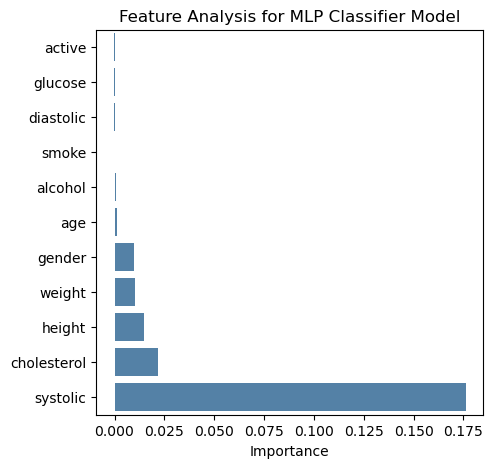

In [96]:
# We imported the permutation_importance module from sklearn. The permutation_importance module is indicative of how much the model 
# depends on a particular feature.
feature_importance = permutation_importance(best_mlp, X_test, y_test, n_jobs=-1)
feature_importance

# As seen above the 'importances_mean' key corresponds to the mean of importance of each feature
# We would like to sort the array to get the importances in an increasing order
# We can sort it using the sort() method, however we will use argsort() method which will sort the list of indices that would be present after sorting
# This argsort will be used to plot the features in an increasing order without actually sorting the data 
args = feature_importance.importances_mean.argsort()
args

# Plotting the feature importance using the seaborn library
plt.figure(figsize=(5,5))
sns.barplot(y=X_test.columns[args], x=feature_importance.importances_mean[args], estimator=sum, orient="h", color= "steelblue")
plt.xlabel('Importance')
plt.title('Feature Analysis for MLP Classifier Model')
plt.show()
